# Feature Engineering, Regularization & Ensembles

## Feature Engineering
- Feature engineering is the process of turning raw data into useful features that help improve the performance of machine learning models. 
- It includes choosing, creating and adjusting data attributes to make the model’s predictions more accurate. 
- The goal is to make the model better by providing relevant and easy-to-understand information.

**What & Why:**
    Create new features or transform existing ones to make patterns more apparent to the model. Select only relevant features to reduce noise and overfitting.
    
**How:**
    - Extract domain-specific features (e.g., date/time parts, aggregations).
    - Generate polynomial or interaction features to capture complex relationships.
    - Use feature selection methods: filter (variance threshold, correlation), wrapper (RFE), embedded (Lasso).
    - Apply dimensionality reduction techniques like PCA or autoencoders.
- **Tools:** scikit-learn preprocessing & feature selection modules, custom Python code.

### 🔧 **When to Use:**

- When raw data is not directly useful for ML models.
- When models underperform due to irrelevant/noisy features.
- When more **informative features** are needed for better accuracy.

### 🌍 **Where to Use:**

- Predictive modeling in finance (e.g., credit scoring).
- Text analysis (e.g., word embeddings, TF-IDF).
- Image processing (e.g., edge detection, pixel transformations).
- Sensor/IoT data (e.g., rolling averages, time-based features).

### ✅ **Advantages:**

- Improves **model performance** by providing more relevant information.
- Helps models **generalize better**.
- Makes data more **interpretable**.

### ⚠️ **Limitations:**

- Requires **domain knowledge** to create meaningful features.
- Can be **time-consuming**.
- Poorly engineered features may worsen performance.

### ❓ **Why is it Used?:**

Because machine learning algorithms rely heavily on the **quality of features**. Good features can turn a weak model into a strong one, while poor features can ruin even the best algorithms.

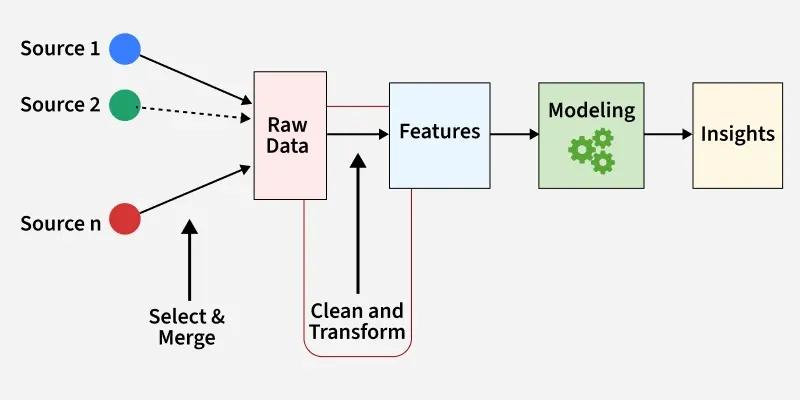

Feature engineering plays a key role in improving model performance. By refining and selecting the right features, we can:

- Improve accuracy as the model learns patterns more effectively.

- Reduce overfitting by focusing only on the most relevant inputs.

- Boost interpretability since meaningful features make predictions easier to understand.

- Enhance efficiency with faster training and prediction, saving time and resources.

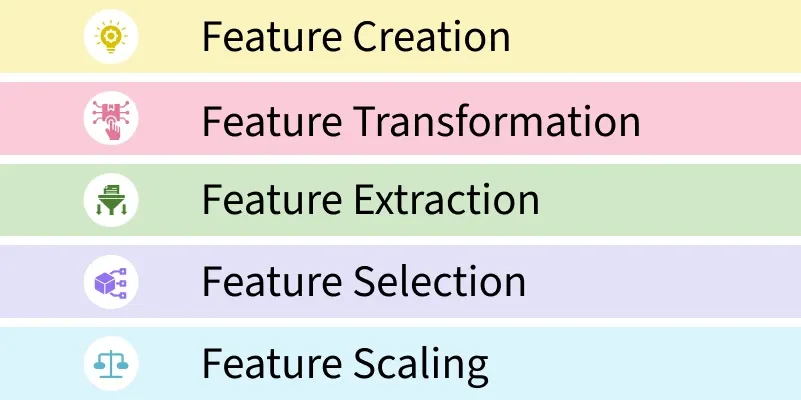

### Key Aspects of Feature Engineering

#### Feature Creation

- Domain-specific: Based on industry knowledge or business rules.

- Data-driven: Derived by identifying patterns in the data.

- Synthetic: Formed by combining existing features.

#### Feature Transformation

- Normalization & Scaling: Brings features to a consistent range.

- Encoding: Converts categorical data into numerical (e.g., one-hot).

- Mathematical transformations: Handles skewed data (e.g., log transformation).

#### Feature Extraction

- Dimensionality reduction: Techniques like PCA retain key info while reducing features.

- Aggregation & Combination: Simplifies by averaging, summing, or merging features.

#### Feature Selection

- Filter methods: Use statistical measures (e.g., correlation).

- Wrapper methods: Evaluate subsets based on model performance.

- Embedded methods: Selection happens during model training.

#### Feature Scaling

- Min-Max scaling: Rescales to a fixed range (e.g., 0–1).

- Standard scaling: Normalizes to mean 0 and variance 1.

### General Steps in Feature Engineering

- **Data Cleansing**: Fix missing values, errors, or inconsistencies to ensure data quality.
- **Data Transformation**: Prepare data for modeling with scaling, normalization, or encoding.
- **Feature Extraction**: Create new features from existing ones to capture hidden patterns.
- **Feature Selection**: Keep only the most useful features while removing redundancy.
- **Feature Iteration**: Refine features based on model results for continuous improvement.

In [380]:
import pandas as pd

data = {'Color': ['Red', 'Blue', 'Green', 'Blue']}
df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=['Color'], prefix='Color')

print(df_encoded)

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1        True        False      False
2       False         True      False
3        True        False      False


In [382]:
import pandas as pd

data = {'Age': [23, 45, 18, 34, 67, 50, 21]}
df = pd.DataFrame(data)

bins = [0, 20, 40, 60, 100]
labels = ['0-20', '21-40', '41-60', '61+']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print(df)

   Age Age_Group
0   23     21-40
1   45     41-60
2   18      0-20
3   34     21-40
4   67       61+
5   50     41-60
6   21     21-40


---

### 🔢 **Polynomial Features**

#### 📘 **Definition:**

Polynomial features are new features created by raising existing features to higher powers or combining them in polynomial expressions. They help models capture **non-linear relationships** between input variables and the target.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

#### 🔧 **When to Use:**

- When a linear model underfits the data.
- When the relationship between input and output is nonlinear.
- When you want to capture interaction effects between features.
- In regression tasks where polynomial regression is needed.
  
#### 🌍 **Where to Use:**

- Predicting housing prices (relationship between square footage and price is often non-linear).
- Physics/engineering problems where outcomes follow quadratic or cubic patterns.
- Polynomial regression in time-series forecasting.

#### 💡 **Use Case:**

Suppose we want to predict salary based on years of experience. A linear model might underfit. Adding polynomial features like (x2,x3)(x^2, x^3)(x2,x3) allows capturing more complex patterns.

#### ✅ **Advantages:**

- Captures **non-linear relationships**.
- Enhances performance of **linear models**.
- Useful in small datasets with clear patterns.

#### ⚠️ **Limitations:**

- High-degree polynomials can cause **overfitting**.
- Increases **computational complexity**.
- May cause **multicollinearity** among features.

#### ❓ **Why is it Used?:**

To make simple models (like linear regression) powerful enough to represent **curved relationships** in data.
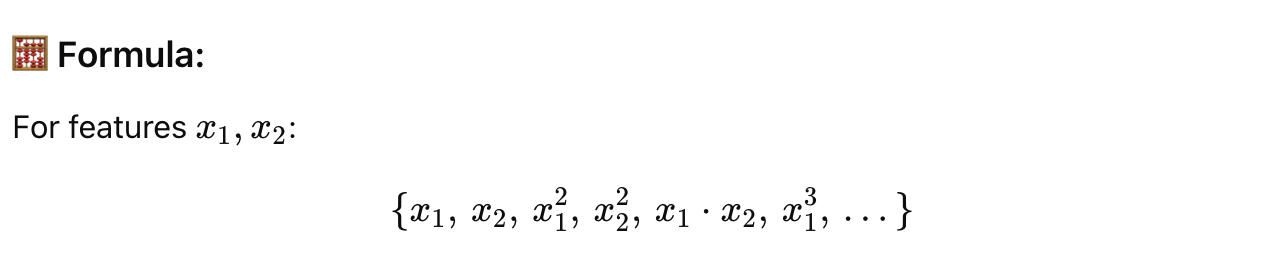

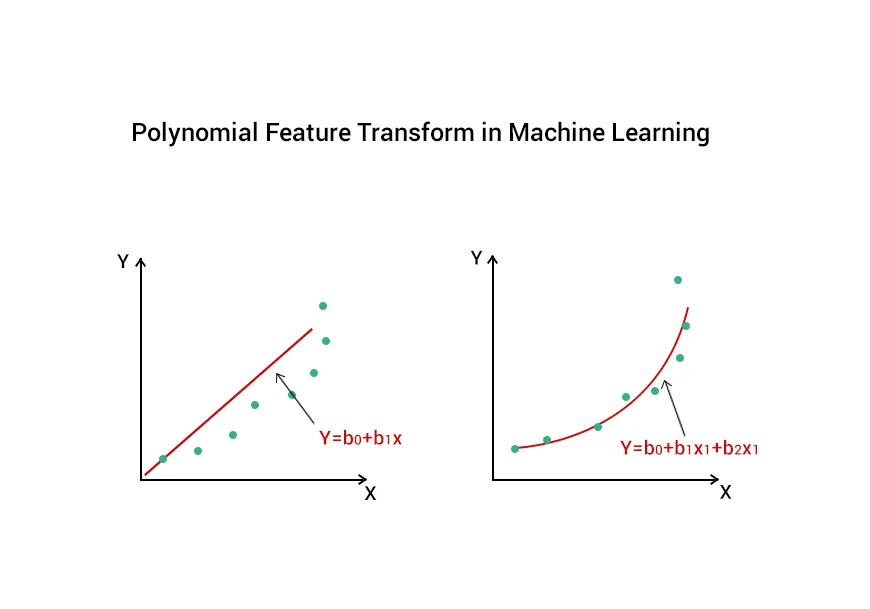

### Polynomial Feature Expansion

In [387]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Create a simple dataset
X = np.array([[2], [3], [4]])
# Instantiate PolynomialFeatures (degree = 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
# Transform dataset
X_poly = poly.fit_transform(X)
print("Original X:\n", X)
print("Polynomial Features:\n", X_poly)

Original X:
 [[2]
 [3]
 [4]]
Polynomial Features:
 [[ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]]


### 🔹 Code Explanation

1. **Create dataset** → `X = [[2], [3], [4]]` is a simple single-feature dataset.
2. **PolynomialFeatures** → `degree=2` generates **polynomial terms up to x²**. `include_bias=False` avoids adding a column of 1s.
3. **Transform data** → `.fit_transform(X)` converts the original feature into polynomial features.

### Using Polynomial Features in Regression

In [391]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Sample dataset
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 5, 10, 17, 26])  # Quadratic pattern
# Create a pipeline with PolynomialFeatures and LinearRegression
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
# Train the model
model.fit(X, y)
# Predictions
y_pred = model.predict(X)
print("Predictions:", y_pred)

Predictions: [ 2.  5. 10. 17. 26.]


### 🔹 Code Explanation

1. **Dataset** → `X = [[1],[2],[3],[4],[5]]`, `y = [2,5,10,17,26]` follows a **quadratic pattern** y≈x2+somethingy ≈ x² + somethingy≈x2+something.
2. **Pipeline** → Combines:
    - `PolynomialFeatures(degree=2)` → expands `X` to `[x, x²]` for capturing non-linear trends.
    - `LinearRegression()` → fits a linear model on the expanded features.
3. **Train & Predict** → `.fit(X, y)` trains the model, `.predict(X)` makes predictions on the same inputs.

---
### Interaction terms

### 📘 **Definition:**
    
Interaction terms are variables formed by multiplying two (or more) original features to explore whether the effect of one predictor on the target variable depends on the level of another predictor. This goes beyond assuming each feature has an independent, additive effect on the outcome.
    
- **Why They Matter**
    
    Including interaction terms lets your model flexibly capture varying relationships—meaning the influence of one variable can change depending on the value of another. This leads to better-fitting models and improved predictive performance.
    
- **How to Construct Them**
    
    Interaction terms are created by multiplying the relevant features (e.g., X1×X2) and adding that product to the regression model.
    
- **Interpreting Interaction Coefficients**
    
    The coefficient on the interaction term reflects how much the effect of one predictor changes for each unit increase in the other predictor. Interpretation becomes conditional: the effect of one variable depends on the level of the interacting variable.
    
- **Implication for Linear Model Structure**
    
    Interaction terms make the model more flexible—allowing different regression slopes for different feature combinations, which can significantly improve model fit.
    
- **Flexibility and Predictive Power**
    
    By enabling different relationships across subgroups or variable combinations, interaction terms notably increase both interpretability and predictive accuracy.

### 🔧 **When to Use:**

- When two variables interact in a way that influences the target.
- When linear models miss relationships because they only consider independent effects.
- To capture **synergies or combined influences** in regression/classification tasks.

### 🌍 **Where to Use:**

- Economics: Income depends on both education and experience combined.
- Medicine: Drug effectiveness may depend on **dosage × age** interaction.
- Marketing: Sales may depend on **advertising spend × season**.

### 💡 **Use Case:**

In predicting crop yield, rainfall and fertilizer separately influence yield, but their **interaction (rainfall × fertilizer)** may have a stronger effect than either alone.

### ✅ **Advantages:**

- Captures **relationships missed by main effects**.
- Improves model **accuracy and interpretability**.
- Works well in regression and GLMs (generalized linear models).

### ⚠️ **Limitations:**

- Too many interaction terms → **curse of dimensionality**.
- Hard to interpret when many variables interact.
- Risk of **overfitting** with small datasets.

### ❓ **Why is it Used?:**

Because real-world phenomena often depend on **combinations of factors**, not just individual ones. Interaction terms allow models to reflect these complexities.

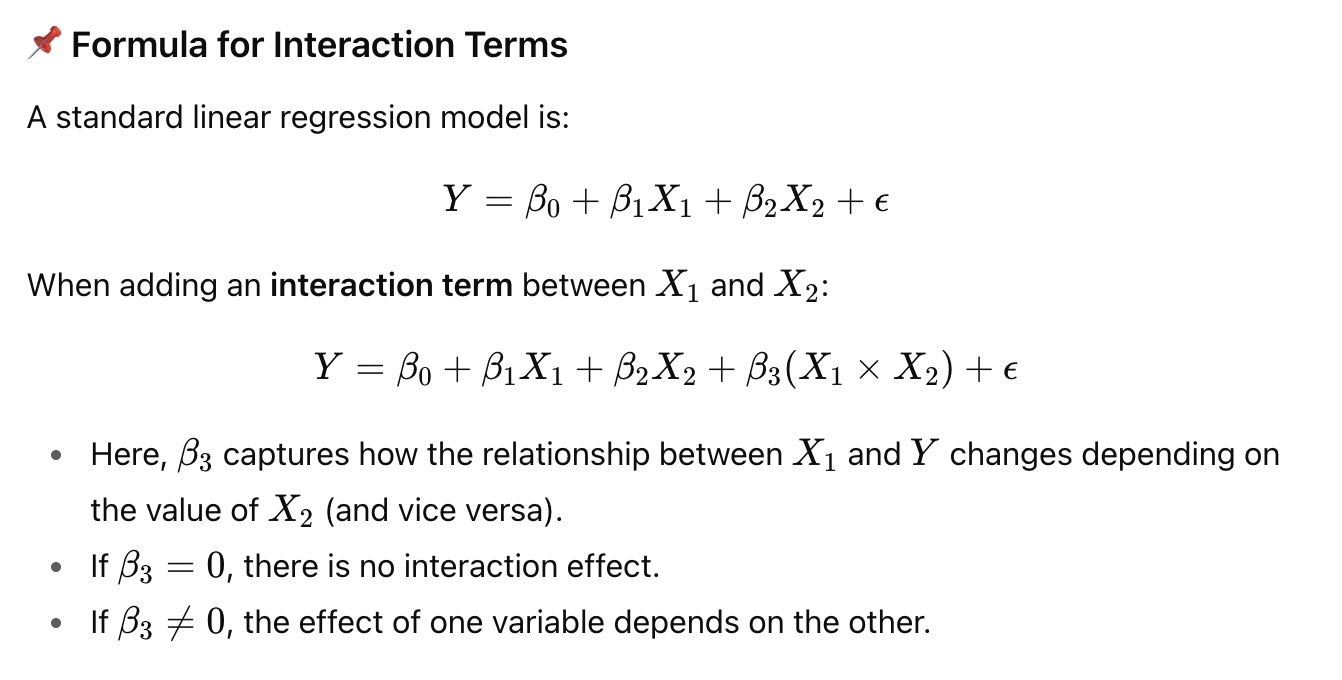

### **Interaction Terms in Regression**

- Capture the combined effect of two or more independent variables on the dependent variable.
- Useful when the relationship between predictors and the target depends on each other’s levels.
- Show that the effect of one variable on the outcome can vary depending on another variable.
- Example: Predicting user time on an e-commerce platform based on past behavior.

In [396]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Example dataset
data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5],
    'X2': [2, 4, 6, 8, 10],
    'Y':  [3, 6, 8, 11, 15]
})

X = data[['X1', 'X2']]
y = data['Y']

# Create interaction term using PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_interaction = poly.fit_transform(X)

# Fit linear regression with interaction
model = LinearRegression().fit(X_interaction, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.32285714 0.64571429 0.10714286]
Intercept: 1.3999999999999924


### 🔹 Code Explanation 

1. **Dataset** → Features `X1`, `X2` and target `Y`.
2. **Interaction term** → `PolynomialFeatures(interaction_only=True)` creates **X1·X2** without higher powers.
3. **Model** → `LinearRegression` fits `Y` using the interaction term.

### 🔹 Output

- **Coefficients** → Show the effect of `X1`, `X2`, and `X1·X2` on `Y`.
- **Intercept** → Base value when all features are 0.

This captures how `X1` and `X2` **jointly influence** the target through their interaction.

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.157e+26
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           1.13e-77
Time:                        15:24:49   Log-Likelihood:                 260.82
No. Observations:                  10   AIC:                            -513.6
Df Residuals:                       6   BIC:                            -512.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

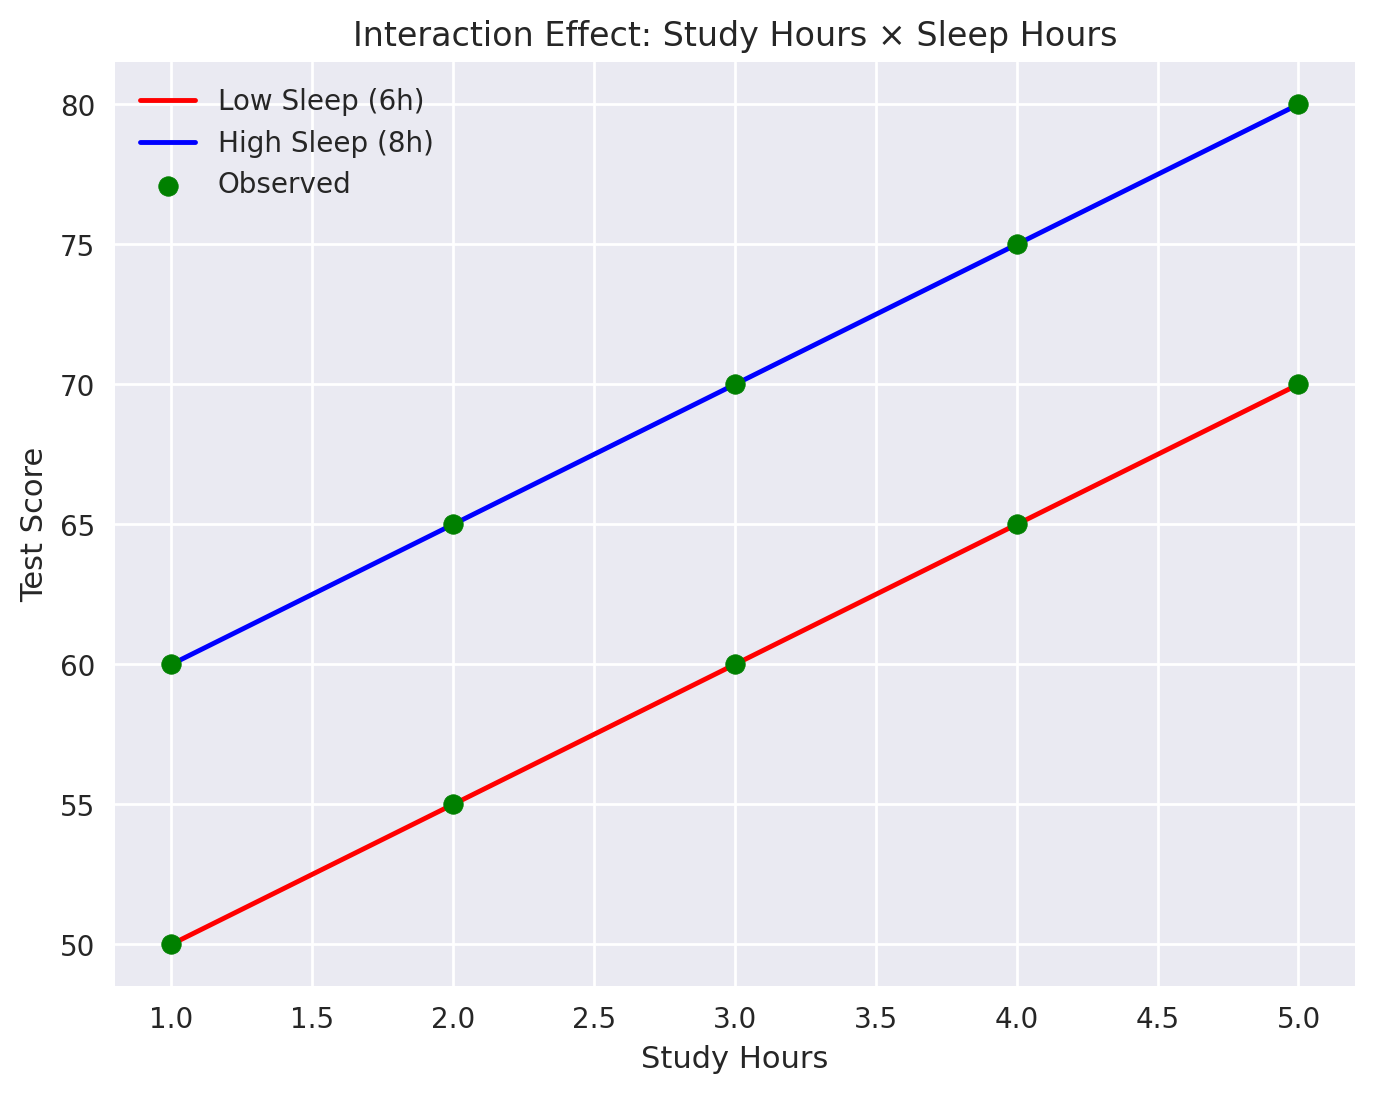

In [399]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Sample dataset
data = {
    "study_hours": [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    "sleep_hours": [6, 6, 6, 6, 6, 8, 8, 8, 8, 8],  # 6 = Low sleep, 8 = High sleep
    "score": [50, 55, 60, 65, 70, 60, 65, 70, 75, 80]
}

df = pd.DataFrame(data)

# Fit OLS model with interaction term
model = smf.ols("score ~ study_hours * sleep_hours", data=df).fit()
print(model.summary())

# Prepare range for predictions
study_range = np.linspace(df['study_hours'].min(), df['study_hours'].max(), 100)

# Predict for sleep_hours = 6 (Low Sleep)
low_sleep = pd.DataFrame({
    "study_hours": study_range,
    "sleep_hours": 6
})
low_pred = model.predict(low_sleep)

# Predict for sleep_hours = 8 (High Sleep)
high_sleep = pd.DataFrame({
    "study_hours": study_range,
    "sleep_hours": 8
})
high_pred = model.predict(high_sleep)

# Plot interaction effects
plt.figure(figsize=(8,6))
plt.plot(study_range, low_pred, label='Low Sleep (6h)', color='red')
plt.plot(study_range, high_pred, label='High Sleep (8h)', color='blue')
plt.scatter(df['study_hours'], df['score'], color='green', zorder=5, label='Observed')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.title('Interaction Effect: Study Hours × Sleep Hours')
plt.legend()
plt.grid(True)
plt.show()

### **Code Explanation**

- The code fits an **OLS regression** with `study_hours`, `sleep_hours`, and their **interaction term** (`study_hours * sleep_hours`).
- The interaction term captures how the effect of study hours on test scores **depends on the amount of sleep**.
- Predictions are made across a range of study hours for **Low Sleep (6h)** and **High Sleep (8h)**.
- The plot shows **predicted scores** for each sleep level as lines and the **observed data** as scatter points.

### **Output**

- **Regression summary:** displays coefficients for study hours, sleep hours, and their interaction, indicating their contribution to scores.
- **Plot interpretation:**
    - Red line = low sleep, blue line = high sleep
    - Green points = observed scores
    - Differences in slopes show how sleep modifies the impact of study hours on scores.

---
## **Regularization**

Regularization is a technique used to prevent overfitting, especially in complex models or noisy datasets. It works by adding a **penalty term** to the model’s loss function, discouraging overly complex solutions and encouraging simpler, more generalizable models.

**Why it’s needed:**

- **Overfitting** occurs when a model learns not just the patterns but also the noise in the training data, performing poorly on new data.
- Regularization mitigates overfitting by balancing the model’s ability to fit the training data with its ability to generalize.

**How it works:**

- A penalty is applied to the model’s parameters (e.g., weights), reducing the risk of extreme values.
- **L1 Regularization (Lasso):** Penalizes the absolute values of weights, often setting some to zero, which also performs feature selection.
- **L2 Regularization (Ridge):** Penalizes the squared values of weights, encouraging smaller weights and reducing the influence of individual features.
- **Dropout (Neural Networks):** Randomly disables neurons during training, forcing the network to learn more robust patterns.

**Choosing regularization:**

- The type and strength of regularization depend on the dataset and problem.
- Cross-validation is commonly used to find the optimal penalty parameter.

**Benefits:**

- **Improved generalization:** Reduces overfitting for better performance on unseen data.
- **Reduced model complexity:** Produces simpler, easier-to-interpret models.
- **Stability:** Makes models less sensitive to small variations in the training data.
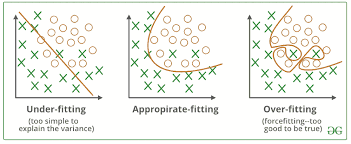
---

### **Lasso Regression (L1 Regularization):**

- **Objective:** Prevent overfitting by adding a penalty proportional to the absolute value of coefficients.
- **Penalty Term:** Adds the absolute value of coefficients.
- **Feature Selection:** Performs automatic feature selection by setting less important predictors' coefficients to zero.
- **Coefficient Shrinkage**: Can shrink coefficients to exactly zero.
- **Best Use Case:** When you suspect that only a subset of predictors is important, and the model should focus on those while ignoring the irrelevant ones.

### ✅ **Advantages:**

- Performs **feature selection** automatically.
- Reduces **overfitting** in models with many features.
- Produces **simpler and interpretable models**.

### ⚠️ **Limitations:**

- Can behave unpredictably when features are **highly correlated**.
- May select **one feature from a group and ignore others**.
- Not suitable if all features are believed to be **important**.

### ❓ **Why is it Used?:**

To improve **model generalization** while simultaneously performing **automatic feature selection**.

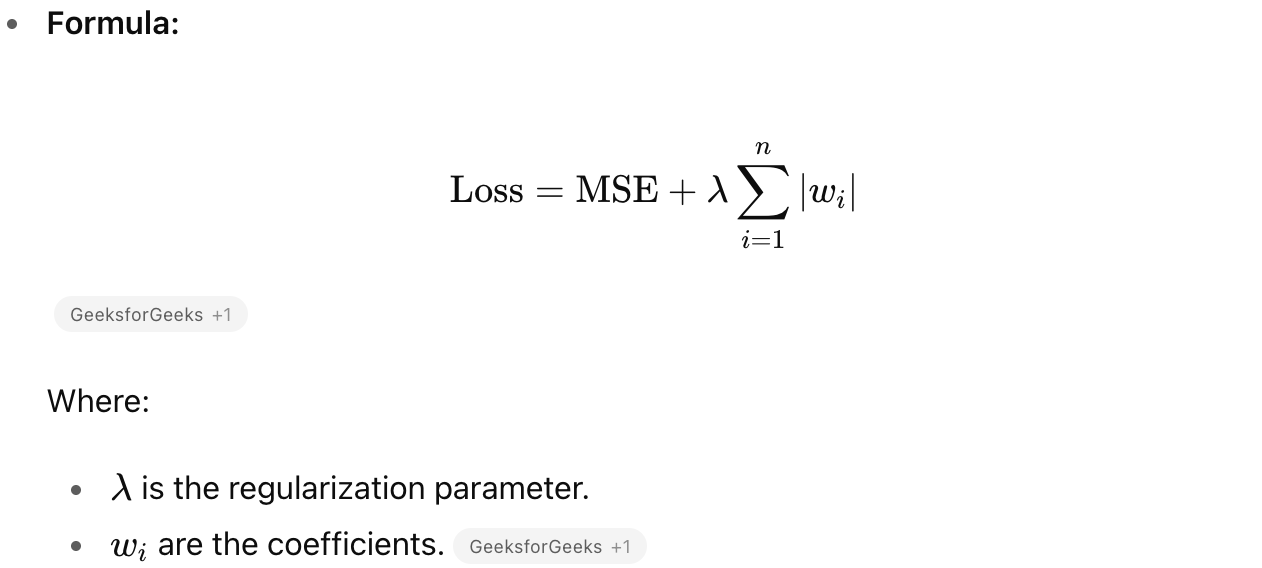

In [404]:
# for lasso regression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lasso.predict(X_test)
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred))
print("Lasso Regression Coefficients:", lasso.coef_)

Lasso Regression MSE: 0.6135115198058131
Lasso Regression Coefficients: [ 3.92693362e-01  1.50810624e-02 -0.00000000e+00  0.00000000e+00
  1.64168387e-05 -3.14918929e-03 -1.14291203e-01 -9.93076483e-02]


### 🔹 Code Explanation (short)

1. **Load dataset** → California Housing dataset for predicting median house values.
2. **Split data** → 80% training, 20% testing.
3. **Lasso Regression** → Applies **L1 regularization** to shrink less important feature coefficients toward zero.
4. **Train model** → Fit the model on training data.
5. **Predict & evaluate** → Compute **Mean Squared Error (MSE)** on test set and display feature coefficients.

### 🔹 Output (short)

- **MSE** → Shows prediction error of the Lasso model on test data. Lower is better.
- **Coefficients** → Some features may have coefficients close to zero due to L1 regularization, highlighting less important features.

---
### **Ridge Regression (L2 Regularization):**

- **Objective:** Minimize overfitting by penalizing large coefficients.
- **Penalty Term:** Adds the squared magnitude of coefficients.
- **Feature Selection:** Does not perform feature selection; all predictors are retained.
- **Coefficient Shrinkage**: Shrinks coefficients toward zero but never exactly zero
- **Best Use Case:** When all predictors are potentially relevant, and the goal is to reduce overfitting rather than eliminate features.
### ✅ **Advantages:**

- Reduces **overfitting** by shrinking coefficients.
- Handles **multicollinearity** better than ordinary least squares.
- Keeps **all features** in the model.

### ⚠️ **Limitations:**

- Does **not perform feature selection** (all coefficients remain non-zero).
- Less interpretable if **many small coefficients** exist.

### ❓ **Why is it Used?:**

To improve **model stability and generalization** in the presence of correlated features without eliminating any predictors.

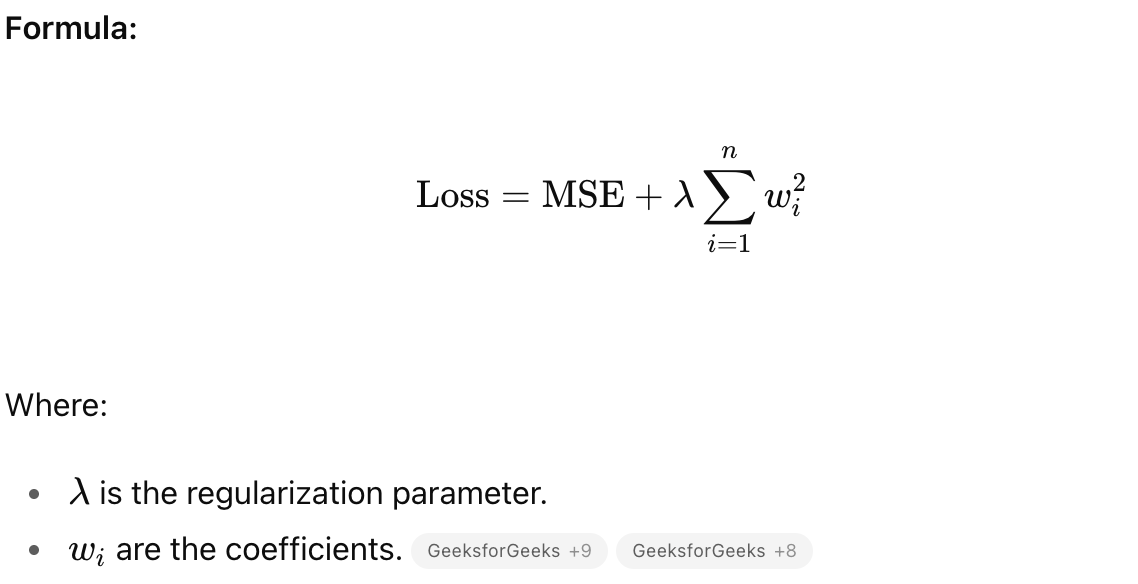

In [408]:
# for ridge regression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ridge.predict(X_test)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred))
print("Ridge Regression Coefficients:", ridge.coef_)

Ridge Regression MSE: 0.5558034669932188
Ridge Regression Coefficients: [ 4.48510924e-01  9.72596535e-03 -1.23014157e-01  7.81416761e-01
 -2.02581346e-06 -3.52585878e-03 -4.19786908e-01 -4.33680793e-01]


### 🔹 Code Explanation

1. **Create dataset** → Synthetic regression dataset with 100 samples, 5 features, and some noise.
2. **Linear Regression** → Fits a standard linear model without any regularization.
3. **Lasso Regression** → Uses **L1 regularization** which can shrink some feature weights to zero, performing feature selection.
4. **Ridge Regression** → Uses **L2 regularization** which shrinks weights but usually keeps all features.
5. **Print weights** → Shows how each method assigns coefficients to the features.

### 🔹 Output

- **Linear Regression weights** → Full weights without shrinkage.
- **Lasso weights** → Some coefficients may be zero due to L1 regularization.
- **Ridge weights** → Coefficients are shrunk compared to linear regression but rarely zero.

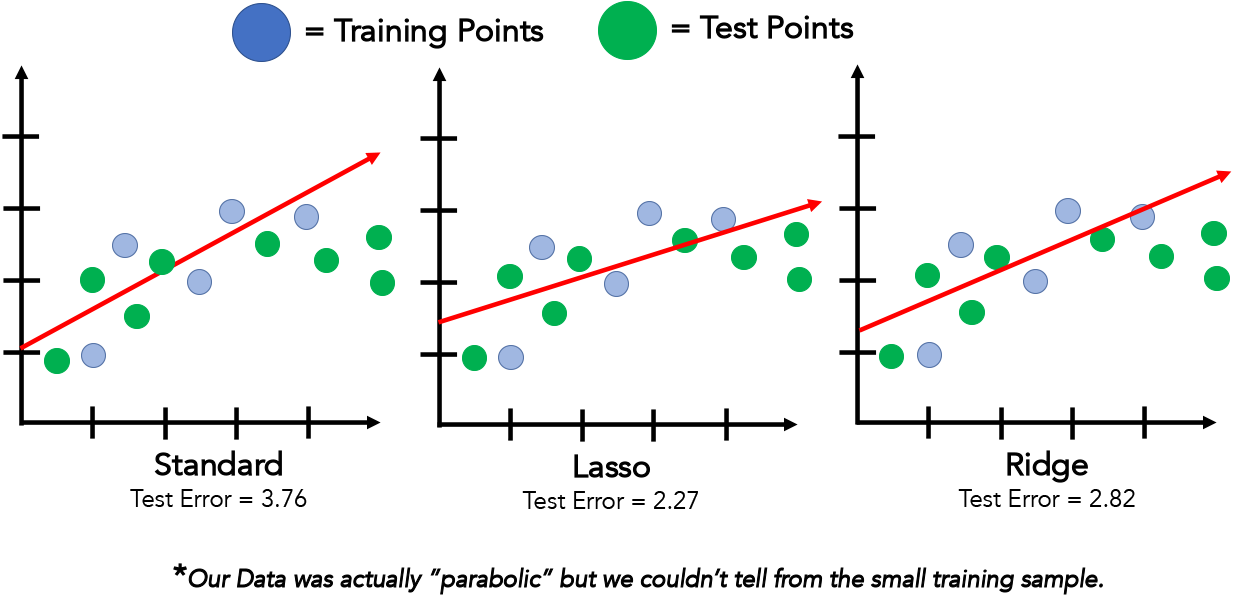

### Effect on weights

- In machine learning models (like linear regression), **weights** are the coefficients assigned to each feature.
- They determine how strongly a feature affects the predicted output:
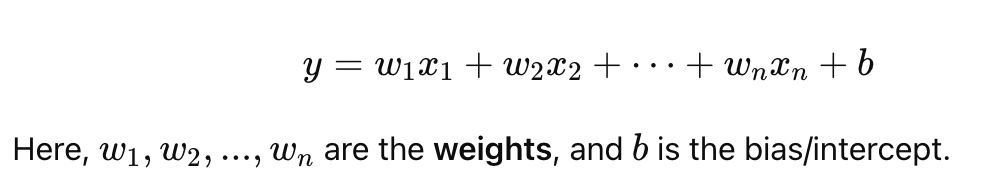
- Larger weights mean the feature has a **stronger influence** on predictions.

1. **Purpose:**
    
    Regularization adds a **penalty term** to the loss function to prevent overfitting and control model complexity.
    
2. **L1 Regularization (Lasso):**
    - Penalizes the **absolute values** of weights.
    - Encourages **sparsity**: some weights are driven exactly to zero.
    - Effect: the model **selects only the most important features**, effectively performing feature selection.
3. **L2 Regularization (Ridge):**
    - Penalizes the **squared values** of weights.
    - Shrinks all weights **toward zero**, but rarely exactly zero.
    - Effect: reduces the influence of less important features, making the model **more stable and less sensitive to noise**.
4. **Overall Impact:**
    - Reduces overfitting by preventing weights from becoming too large.
    - Leads to **simpler, more generalizable models**.
    - Can improve **model interpretability**, especially when many features are irrelevant.

### 🔑 **Effect on Weights Summary**

| **Regularization Type** | **Effect on Weights** | **Visual Insight** |
| --- | --- | --- |
| **L1 (Lasso)** | Some coefficients become exactly **0**, others shrink | Creates **sparse weight vector**, many zeros |
| **L2 (Ridge)** | All coefficients **shrink toward zero** but remain non-zero | Produces **smaller, but dense weight vector** |
| **Elastic Net** | Combines L1 + L2 effects: **some zeros + shrinkage** | Sparse + stable weight vector |

In [414]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.datasets import make_regression

# Create a synthetic dataset
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Ordinary Linear Regression (no regularization)
lr = LinearRegression()
lr.fit(X, y)
print("Linear Regression weights:", lr.coef_)

# Lasso Regression (L1 regularization)
lasso = Lasso(alpha=0.5)  # alpha = regularization strength
lasso.fit(X, y)
print("Lasso Regression weights:", lasso.coef_)

# Ridge Regression (L2 regularization)
ridge = Ridge(alpha=1.0)  # alpha = regularization strength
ridge.fit(X, y)
print("Ridge Regression weights:", ridge.coef_)

Linear Regression weights: [61.83002653 98.93196386 61.31053663 54.99112667 35.59006051]
Lasso Regression weights: [61.35643898 98.33811173 60.47349988 54.44439604 35.19693377]
Ridge Regression weights: [61.23949497 97.79581017 60.24721716 54.3702388  35.37785535]


### **Explanation**

1. **Linear Regression:**
    - No penalty, all features contribute fully.
    - Weights can be large if features are correlated or noisy.
2. **Lasso Regression (L1):**
    - Some weights shrink exactly to **zero**, eliminating less important features.
3. **Ridge Regression (L2):**
    - All weights are **shrunk toward zero**, but none are exactly zero.
    - Reduces overfitting by controlling large weight values.

✅ **Observation:**

- Increasing `alpha` strengthens regularization → weights shrink more.
- Lasso helps with **feature selection**, Ridge improves **stability**.
---

## Ensemble Methods

Ensemble learning is a technique in machine learning where multiple models (often called base learners) are combined to produce a single, stronger predictive model to improve overall performance. The main idea is that combining multiple weak or base models can produce a more accurate, stable, and robust prediction than any individual model. 
- While individual models may not be strong, combining them generally results in better accuracy, stability, and robustness. Think of it as asking a group of experts for advice instead of relying on a single person—errors of individual models are averaged out, producing a more reliable outcome.

### **Benefits of Ensemble Learning**

1. **Reduction in Overfitting:** Aggregates predictions from multiple models to reduce variance.
2. **Improved Generalization:** Performs better on unseen data.
3. **Increased Accuracy:** Combining models typically yields higher predictive accuracy.
4. **Robustness to Noise:** Less sensitive to noisy or erroneous data points.
5. **Flexibility:** Can use different types of models (decision trees, neural networks, SVMs, etc.).
6. **Bias-Variance Tradeoff:**
    - Bagging reduces **variance**.
    - Boosting reduces **bias**.
    - Combining techniques can achieve better overall performance.

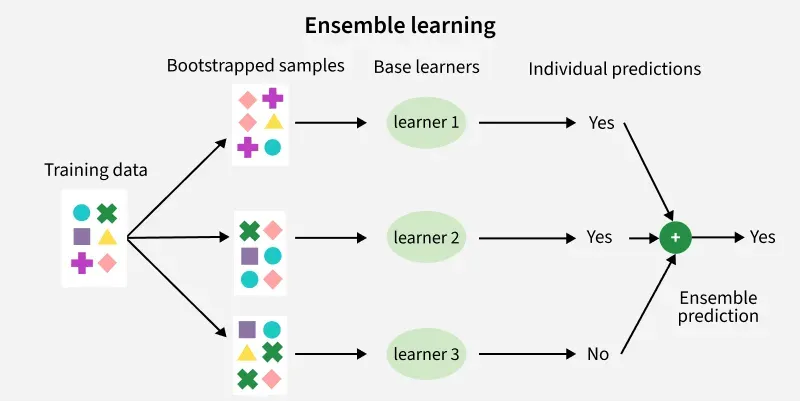

---
### Types of Ensemble Learning

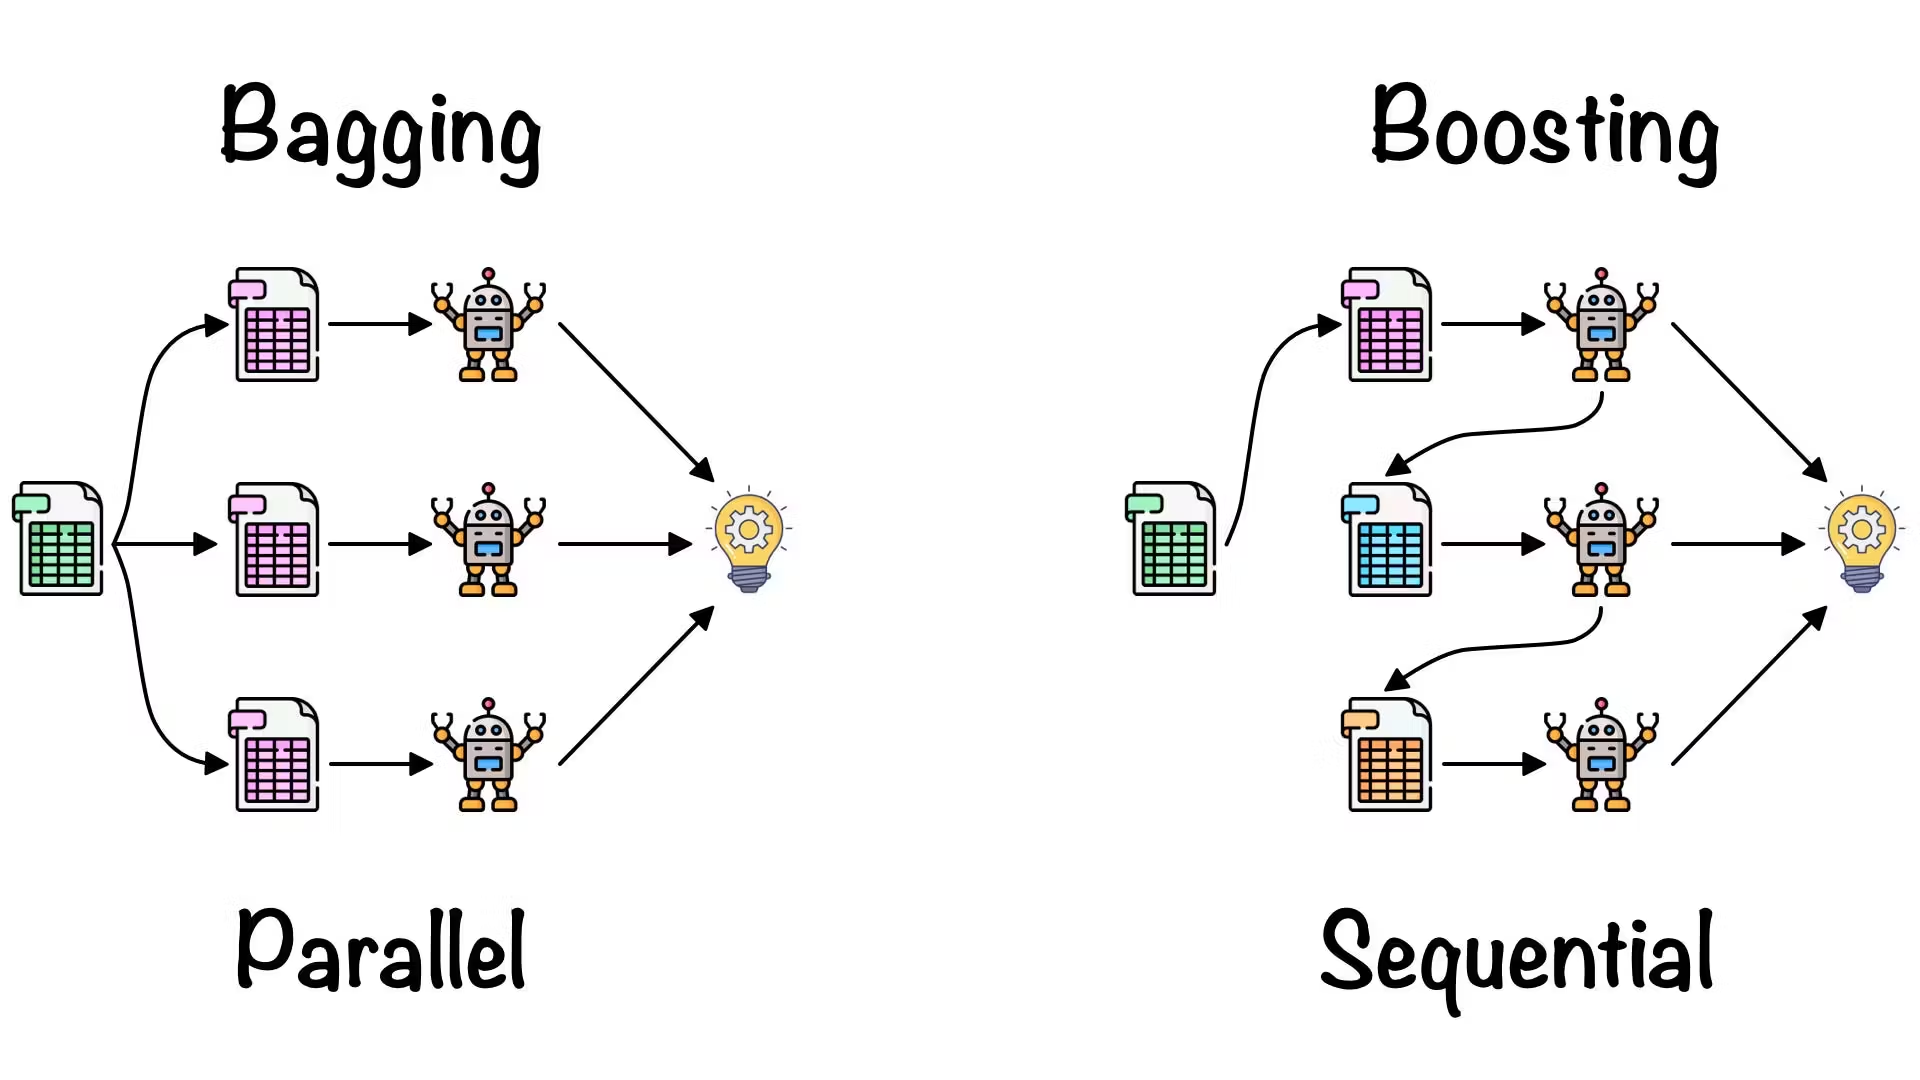

| **Technique**                    | **Category** | **Description**                                                                                                    |
| -------------------------------- | ------------ | ------------------------------------------------------------------------------------------------------------------ |
| Random Forest                    | Bagging      | Builds multiple decision trees on bootstrapped data and aggregates predictions to reduce overfitting and variance. |
| Random Subspace Method           | Bagging      | Trains models on random subsets of features to increase diversity and improve generalization.                      |
| Gradient Boosting Machines (GBM) | Boosting     | Sequentially builds trees where each corrects errors of the previous, improving accuracy.                          |
| XGBoost                          | Boosting     | Optimized gradient boosting with tree pruning, regularization, and parallel processing for efficiency.             |
| AdaBoost                         | Boosting     | Focuses on difficult examples by weighting data points; combines weak classifiers for final prediction.            |
| CatBoost                         | Boosting     | Handles categorical features natively with high accuracy and automatic overfitting control.                        |

### Bagging (bootstrap aggregating)
**Concept:**

- Models are trained independently on different **random subsets** of the training data, selected with replacement.
- Predictions are combined: **averaging** for regression, **majority voting** for classification.
- Helps **reduce variance** and **prevent overfitting**.

**Algorithm Steps:**

1. **Bootstrap Sampling:** Randomly select subsets of data with replacement. Ensures diversity among base models.
2. **Base Model Training:** Train models independently on each subset. Parallel training improves efficiency.
3. **Prediction Aggregation:** Combine predictions from all models.
4. **Out-of-Bag Evaluation:** Samples not included in training a particular model can be used to estimate performance.
5. **Final Prediction:** Aggregate predictions to produce the ensemble output.

#### 🔧 **When to Use:**

- When a single model suffers from **high variance** (overfitting).
- When dataset is **large** or contains noisy observations.
- When using **unstable models** like decision trees that fluctuate with small changes in data.

#### 🌍 **Where to Use:**

- Financial modeling: stock price prediction using regression trees.
- Fraud detection: combining multiple models to reduce false positives.
- Any domain where **reducing variance** improves reliability.

#### 💡 **Use Case:**

- Predicting house prices with multiple decision trees: each tree sees a **random subset** of data and features; the final prediction is averaged to reduce overfitting.

#### ✅ **Advantages:**

- Reduces **variance** without increasing bias.
- Handles **overfitting** of high-variance models.
- Works well with **noisy datasets**.

#### ⚠️ **Limitations:**

- Does **not reduce bias** (so weak models remain weak).
- More **computationally expensive** due to multiple models.
- Harder to interpret than a single model.

#### ❓ **Why is it Used?:**

To **stabilize predictions** by averaging many high-variance models, producing **more reliable and accurate results**.

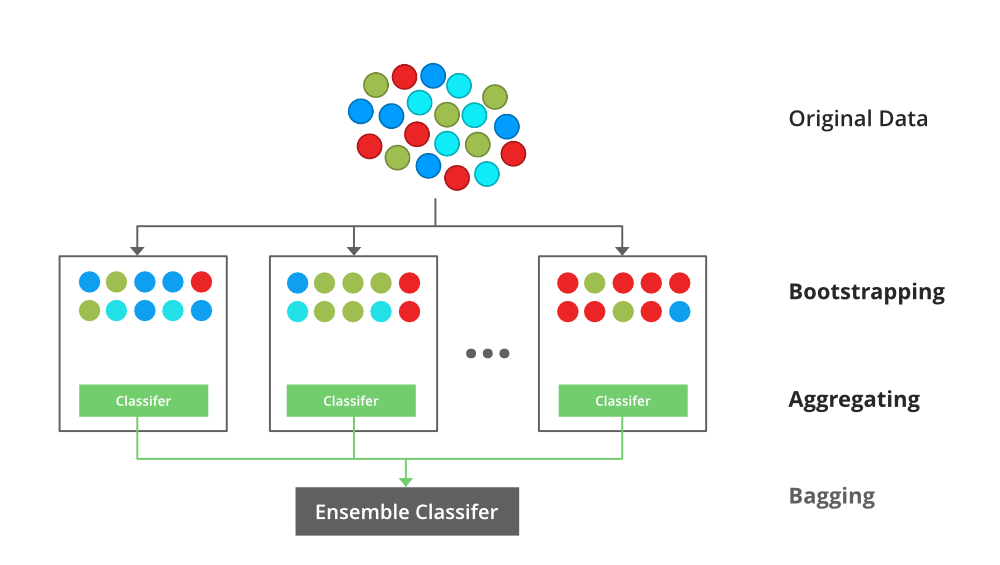

In [422]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load and split data
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base classifier
base_classifier = DecisionTreeClassifier()

# Bagging ensemble
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Predictions and evaluation
y_pred = bagging_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


### 🔹 Code Explanation 
1. **Load dataset** → Iris dataset from `sklearn.datasets`.
2. **Split data** → 80% training, 20% testing.
3. **Base classifier** → A `DecisionTreeClassifier` is used for Bagging.
4. **Bagging ensemble** → `BaggingClassifier` trains 10 decision trees on random subsets of data.
5. **Train model** → Fit Bagging ensemble on training data.
6. **Predict** → Predict classes for the test set.
7. **Evaluate** → Compute accuracy using `accuracy_score`.

### 🔹 Output

- **Accuracy** → Proportion of correct predictions on test set.
    - Example: `Accuracy: 0.97` indicates the Bagging ensemble predicts the Iris classes very well.

---
### **Random Forest Algorithm**

**Definition:**

Random Forest is an ensemble machine learning algorithm that uses multiple decision trees to make predictions. Each tree is trained on a random subset of the data, and the final prediction is determined by combining the results of all trees—majority voting for classification and averaging for regression. This method improves accuracy and reduces errors compared to a single decision tree.

#### **How Random Forest Works**

1. **Create Many Decision Trees:**
    - The algorithm generates multiple decision trees using random samples from the dataset (bootstrapping).
    - Each tree is slightly different because it sees a different subset of data.
2. **Pick Random Features:**
    - Instead of considering all features at each split, each tree selects a random subset of features.
    - This ensures diversity among trees and reduces correlation between them.
3. **Each Tree Makes a Prediction:**
    - Every tree predicts independently based on its training data.
4. **Combine Predictions:**
    - **Classification:** Uses **majority voting** where the most frequent class among trees becomes the final prediction.
    - **Regression:** Uses **averaging** where the final prediction is the mean of all trees’ outputs.
5. **Why It Works Well:**
    - Random subsets of data and features prevent overfitting.
    - Combining multiple predictions increases overall accuracy and robustness.

#### **Key Features of Random Forest**

- **Handles Missing Data:** Can work even when some data is missing.
- **Feature Importance:** Provides insight into which features are most influential.
- **Works Well with Big Data:** Can handle datasets with many features efficiently.
- **Versatile:** Applicable to both classification and regression tasks.

#### **Assumptions**

- Each tree makes predictions independently.
- Random subsets of data and features are used for training.
- Sufficient data is needed for trees to learn unique patterns.
- Combining predictions improves overall accuracy.

#### **Advantages of Random Forest**

- Reduces variance and high accuracy, even for large datasets.
- Handles missing values effectively.
- No need for data normalization.
- Robust to outliers and noisy data.
- Reduces overfitting compared to a single decision tree.
  
#### **Limitations**

- Computationally expensive with many trees.
- Can be slow for very large datasets or many trees.
- Less interpretable than a single decision tree.
- Large forests can consume significant memory.
- Harder to interpret compared to single decision trees.

#### 🔧 **When to Use:**

- When you need **high-accuracy predictions** for classification or regression.
- When dataset has **many features**, some of which may be irrelevant.
- When you want **robustness to noise and outliers**.

#### 🌍 **Where to Use:**

- Predicting credit risk, medical diagnosis, and stock trends.
- Feature importance analysis in high-dimensional datasets.
- Large-scale classification problems where overfitting is a concern.

#### ❓ **Why is it Used?:**

To combine the strengths of **Bagging and random feature selection**, producing a **highly accurate, stable, and robust predictive model**.

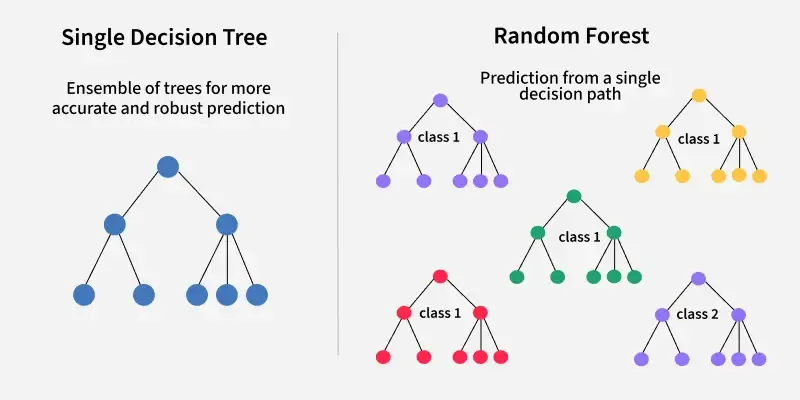
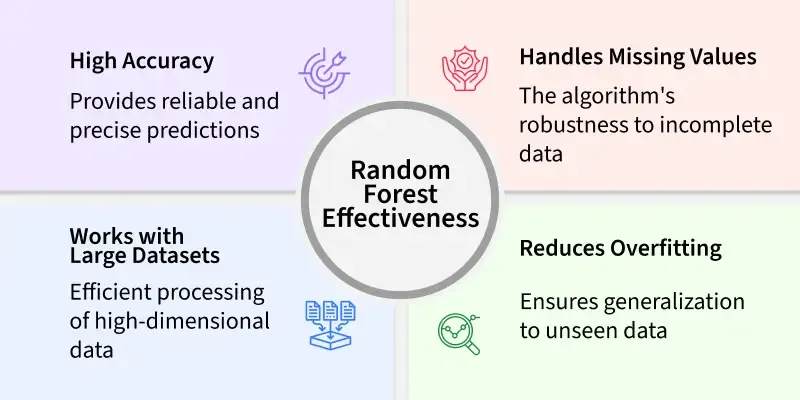

### Random forest classification example

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Sample Wine Features: {'alcohol': 13.64, 'malic_acid': 3.1, 'ash': 2.56, 'alcalinity_of_ash': 15.2, 'magnesium': 116.0, 'total_phenols': 2.7, 'flavanoids': 3.03, 'nonflavanoid_phenols': 0.17, 'proanthocyanins': 1.66, 'color_intensity': 5.1, 'hue': 0.96, 'od280/od315_of_diluted_wines': 3.36, 'proline': 845.0}
Predicted Class: class_0


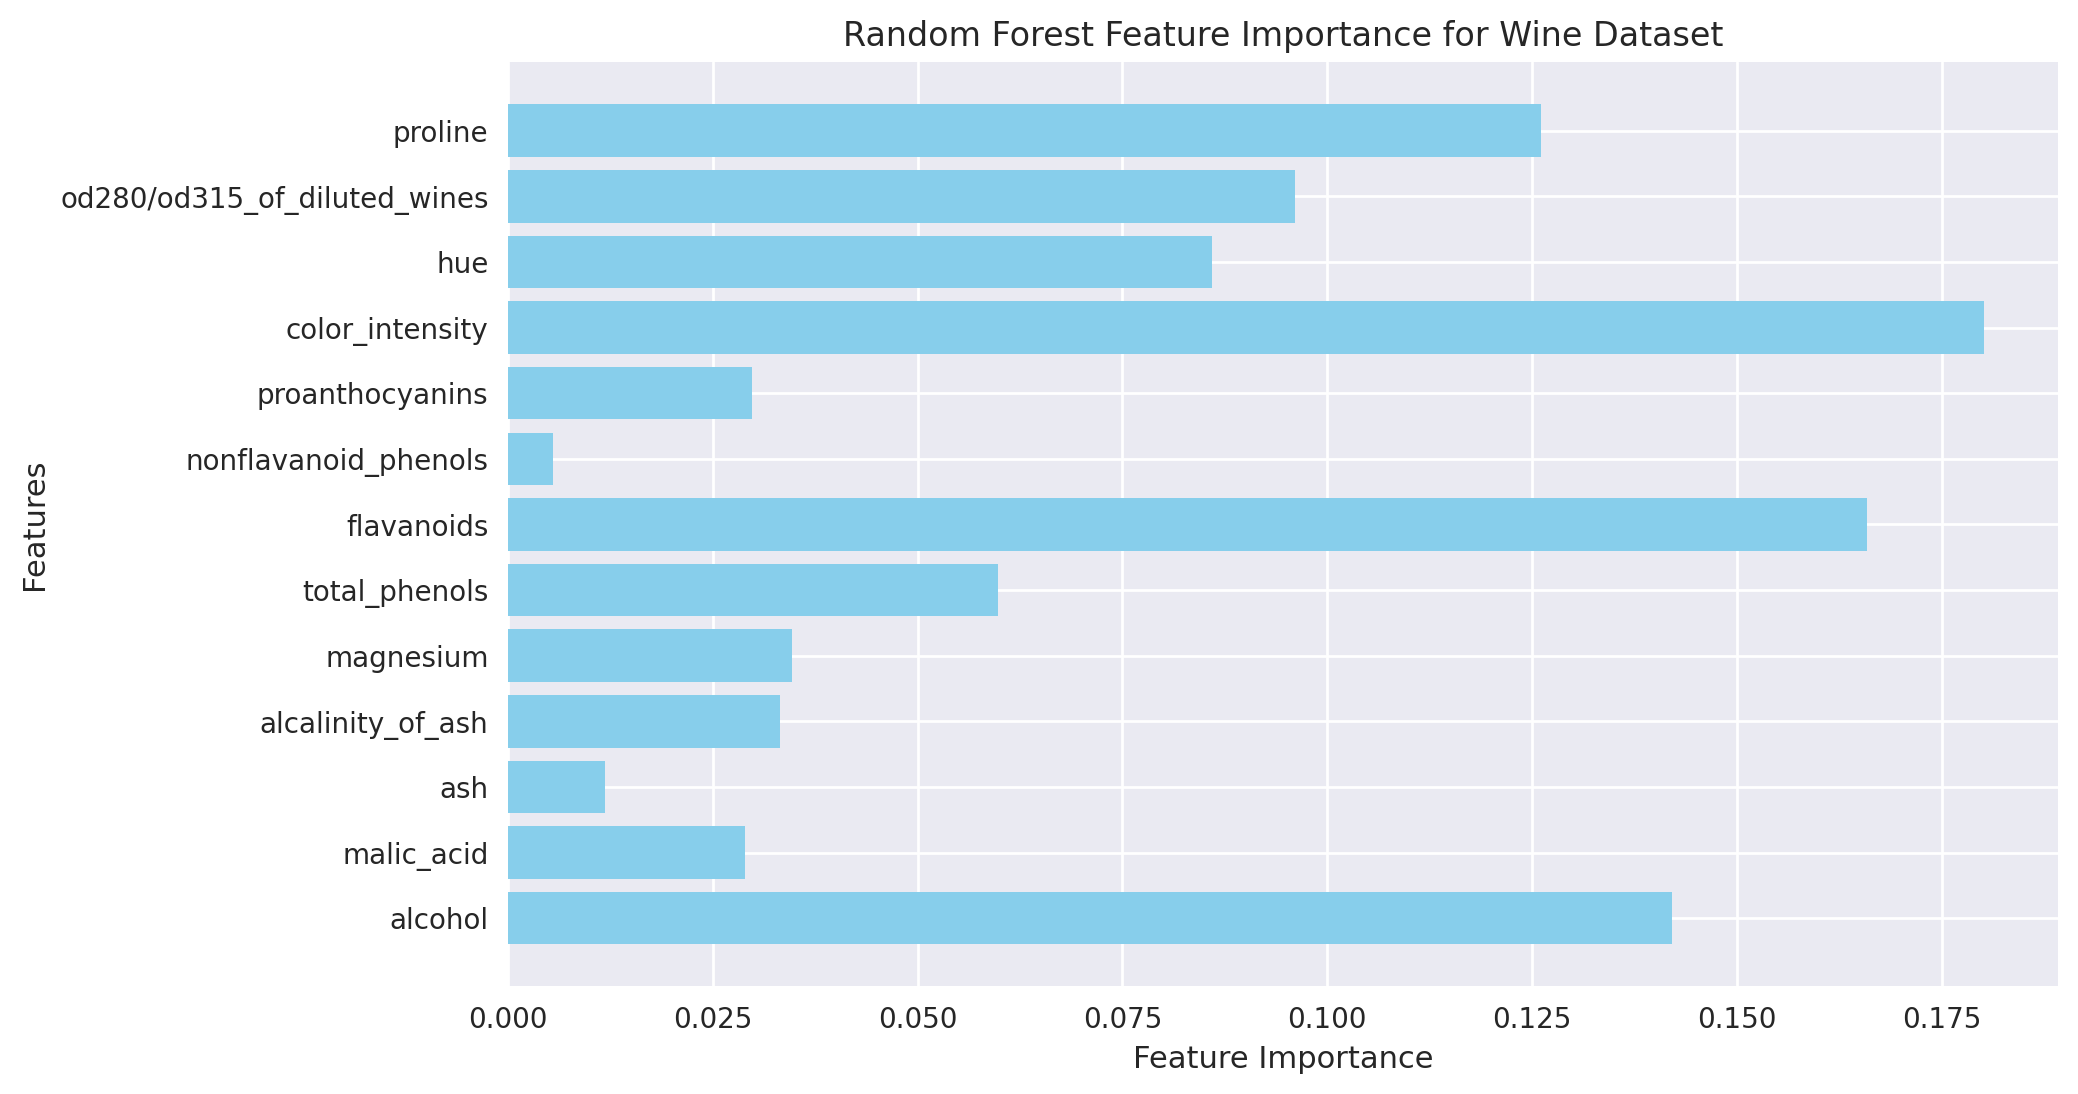

In [427]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

# Sample prediction
sample = X_test.iloc[0:1]
prediction = rf_classifier.predict(sample)
print(f"\nSample Wine Features: {sample.iloc[0].to_dict()}")
print(f"Predicted Class: {wine.target_names[prediction[0]]}")

# Plot feature importance
importances = rf_classifier.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance for Wine Dataset")
plt.show()

**Code Explanation:**

- Loads the Wine dataset and splits it **70-30** for training/testing.
- Trains a **Random Forest Classifier** with 100 trees.
- Makes predictions, calculates **accuracy** and **classification report**.
- Predicts a single sample and plots **feature importance**.

**Output:**

- **Accuracy & classification report** show model performance.
- **Sample prediction** shows predicted wine class.
- **Feature importance plot** highlights which chemical features most influence classification.
---

### Random forest regression example

In [431]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml

# Load House Prices dataset from OpenML
boston = fetch_openml(name="house_prices", as_frame=True)
data = boston.frame

# Features and target
X = data.drop('SalePrice', axis=1)  # 'SalePrice' is the target
y = data['SalePrice']

# Handle categorical features
X = pd.get_dummies(X, drop_first=True)

# Split dataset (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Sample prediction
sample_data = X_test.iloc[0].values.reshape(1, -1)
predicted_value = rf_regressor.predict(sample_data)
print(f"Predicted House Price: {predicted_value[0]:.2f}")
print(f"Actual House Price: {y_test.iloc[0]:.2f}")

Mean Squared Error: 743195845.44
R-squared Score: 0.89
Predicted House Price: 139222.25
Actual House Price: 154500.00


**Code Explanation:**

- Loads the **House Prices** dataset.
- Prepares features (`X`) and target (`y`) and converts categorical columns to numeric.
- Splits data into **70% training** and **30% testing**.
- Trains a **Random Forest Regressor** with 100 trees.
- Predicts house prices for the test set and evaluates using **MSE** and **R² score**.
- Makes a sample prediction for one test instance.

**Output:**

- **MSE**: Average squared error of predictions (lower is better).
- **R² score**: How well the model explains variance (closer to 1 is better).
- **Sample prediction**: Shows predicted vs actual house price for one example.
---

### Boosting

#### Definition:
Boosting is an ensemble learning technique where multiple weak classifiers are combined sequentially to form a strong classifier. Each subsequent model focuses on the errors of the previous model, improving overall predictive accuracy. Boosting is commonly used for both classification and regression tasks.

**Concept:**

- Models are trained **sequentially**, with each model focusing on **correcting errors** of the previous models.
- Final prediction is a **weighted combination** of all models.
- Helps **reduce bias** and improve predictive accuracy.

**Algorithm Steps:**

1. **Initialize Model Weights:** Begin with a weak learner, assign equal weights to all examples.
2. **Train Weak Learners:** Train models sequentially.
3. **Weight Adjustment:** Increase weights for misclassified examples so the next model focuses more on difficult cases.

#### 🔧 **When to Use:**

- When a single model has **high bias** (underfitting).
- When you want to **improve prediction accuracy** by combining weak learners.
- When handling **complex datasets with non-linear patterns**.

#### 🌍 **Where to Use:**

- Classification and regression tasks with **structured/tabular data**.
- Predicting customer churn, disease diagnosis, or credit risk.
- Kaggle competitions or predictive analytics projects.

#### 💡 **Use Case:**

- Predicting loan defaults: sequentially train trees where each one **focuses on misclassified samples** from the previous tree.

#### ✅ **Advantages:**

- Reduces **bias and variance**.
- Produces **highly accurate models**.
- Can handle **complex relationships** in data.

#### ⚠️ **Limitations:**

- Sequential training is **computationally expensive**.
- Sensitive to **outliers** and noisy data.
- Harder to interpret than single models.

#### ❓ **Why is it Used?:**

To **sequentially improve weak models**, combining them into a **strong, highly accurate ensemble**.

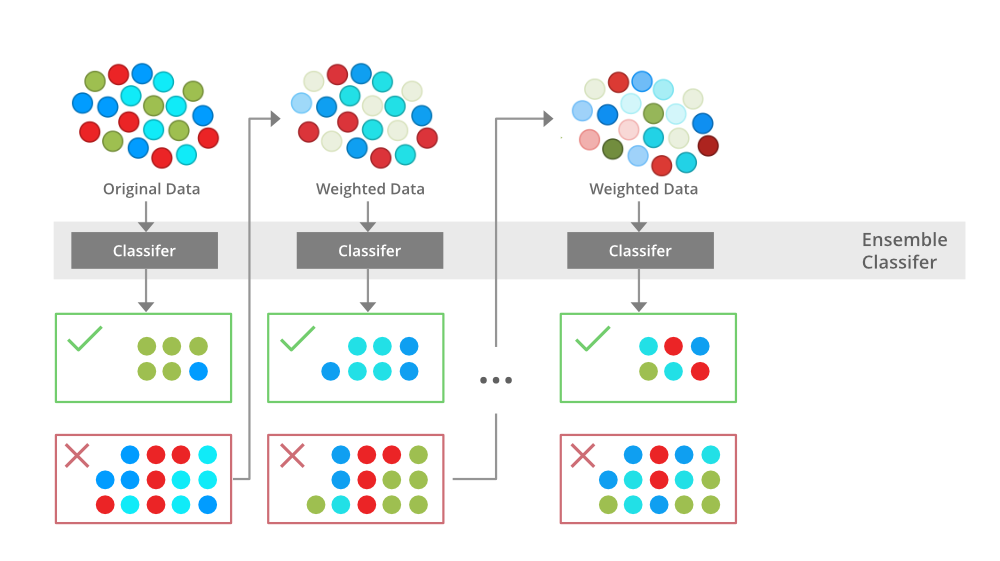

---
### **AdaBoost (Adaptive Boosting)**

#### 📘 **Definition:**

AdaBoost is a boosting algorithm where **weak learners** (usually decision stumps) are trained sequentially, and **weights are assigned to samples**, giving more importance to misclassified instances for the next model.

#### 🔧 **When to Use:**

- When a dataset has **hard-to-classify examples**.
- When improving performance of **simple classifiers**.
- When you want **error-focused sequential learning**.

#### 🌍 **Where to Use:**

- Binary classification problems like spam detection.
- Medical diagnosis where **rare cases** need emphasis.
- Customer churn prediction with imbalanced classes.

#### 💡 **Use Case:**

- Predicting spam emails: misclassified emails are **given higher weight** for the next weak learner.

#### ✅ **Advantages:**

- Focuses on **difficult samples**, improving accuracy.
- Can **boost performance of weak classifiers**.
- Reduces **bias and variance** compared to a single model.

#### ⚠️ **Limitations:**

- Sensitive to **outliers**.
- Sequential learning **increases training time**.

#### ❓ **Why is it Used?:**

To create a **strong classifier** by sequentially focusing on the **errors of weak learners**.

**Working of AdaBoost:**

1. **Initialization:**
    - All training samples are assigned equal weights initially.
    - A weak classifier (like a decision stump) is trained on the dataset.
    - Misclassified points are identified.
2. **Weight Adjustment:**
    - Misclassified points are given higher weights so the next classifier focuses more on them.
    - A new weak classifier is trained using the updated weights.
3. **Sequential Training:**
    - This process continues for a predefined number of iterations or until the model predicts the training set accurately.
    - Each weak learner corrects the mistakes of its predecessors.
4. **Final Ensemble Model:**
    - The final model aggregates all weak classifiers (B1, B2, B3...) to create a **strong classifier**.
    - This combined model achieves **higher accuracy** than any individual weak learner.

**Key Benefit:**

- Reduces **bias** and **variance**, improving model accuracy and robustness.

In [435]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load a sample dataset (e.g., the Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the AdaBoostClassifier
# n_estimators: The number of weak learners (e.g., decision stumps) to train
# learning_rate: Shrinks the contribution of each classifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train the AdaBoost model
model = abc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


### 🔹 Code Explanation

1. **Load dataset** → Iris dataset from `sklearn.datasets`.
2. **Split data** → 70% training, 30% testing.
3. **Initialize AdaBoost** → 50 weak learners (default: decision stumps), learning rate 1.
4. **Train model** → Fit AdaBoost on training data.
5. **Predict** → Predict classes for the test set.
6. **Evaluate** → Compute accuracy of predictions using `accuracy_score`.

### 🔹 Output

- **Accuracy** → Fraction of correct predictions on the test set.
    - Example: `Accuracy: 0.98` indicates the AdaBoost model predicts the Iris classes very well.

---
### ⚡ **Gradient Boosting**

#### 📘 **Definition:**

Gradient Boosting is a boosting technique where each new model is trained to **predict the residual errors** (gradients) of previous models, minimizing a **loss function** using **gradient descent**.

It belongs to the boosting family of algorithms, which combine multiple weak learners sequentially to build a strong predictive model.

Unlike bagging methods, which train models independently, gradient boosting trains models sequentially, with each new model trying to correct the errors of its predecessor.

### **2. How Gradient Boosting Works**

1. **Sequential Learning:**
    - The algorithm starts with training a base model (often a decision tree) on the original dataset.
    - This model makes predictions and the errors (residuals) are calculated.
2. **Residuals Calculation:**
    - Each subsequent model is trained to predict the **residuals** (errors) of the previous model.
    - Essentially, the new model focuses on what the previous model got wrong.
3. **Shrinkage (Learning Rate):**
    - Each model’s predictions are multiplied by a **learning rate (η)** ranging from 0 to 1.
    - Smaller learning rates reduce overfitting but require more trees.
    - Larger learning rates increase each tree’s impact but can overfit the data.
4. **Final Prediction:**
    - The predictions from all models are summed to produce the final output:
    
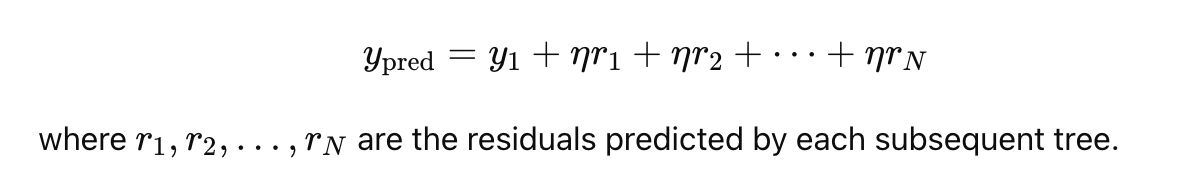

#### 🔧 **When to Use:**

- When high predictive accuracy is needed for **complex datasets**.
- When the dataset has **non-linear patterns** that simple models cannot capture.

#### 🌍 **Where to Use:**

- Regression problems like predicting house prices.
- Classification problems like fraud detection.
- Time-series forecasting with structured features.

#### 💡 **Use Case:**

- Predicting sales: each tree learns to **correct errors of the previous tree** based on residuals.

#### ✅ **Advantages:**

- Handles **non-linear relationships** effectively.
- Reduces **bias and variance**.
- Can optimize **different loss functions** for flexibility.

#### ⚠️ **Limitations:**

- **Sensitive to outliers**.
- Training can be **slow due to sequential nature**.
- Harder to tune than simpler models.

#### ❓ **Why is it Used?:**

To iteratively **improve predictions** by focusing on the **residual errors of prior models**, achieving high accuracy.

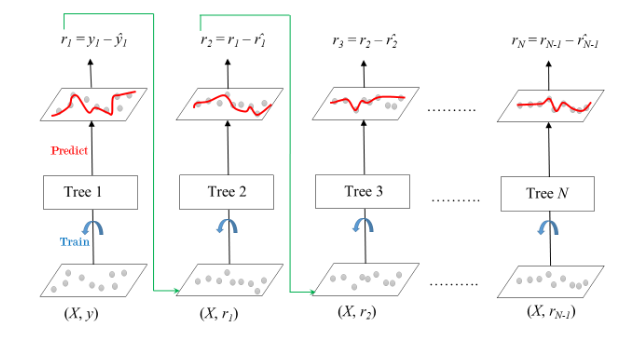

### Gradient boosting classification example

In [441]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

# Load Wine dataset
SEED = 23
X, y = load_wine(return_X_y=True)

# Split dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=SEED)

# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_features=5, random_state=100)

# Train the model
gbc.fit(train_X, train_y)

# Predict on the test set
pred_y = gbc.predict(test_X)

# Evaluate accuracy
acc = accuracy_score(test_y, pred_y)
print("Gradient Boosting Classifier accuracy on Wine dataset is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy on Wine dataset is : 1.00


Code Explanation

- Dataset: Wine dataset with 3 classes for classification.
- Train-Test Split: 75% training, 25% testing.
- Model: Gradient Boosting Classifier with 300 trees, learning rate 0.05, using max 5 features per tree.
- Prediction & Evaluation: Model predicts wine classes on test data and computes accuracy.

Output:

- Indicates the model correctly classifies 100% of test samples.

### Gradient boosting regression example

In [445]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor  # For Gradient Boosting regression
from sklearn.model_selection import train_test_split     # To split dataset into training and testing
from sklearn.metrics import mean_squared_error          # To evaluate model performance
from sklearn.datasets import load_diabetes              # Sample dataset for regression

# Set a random seed for reproducibility
SEED = 23

# Load the Diabetes dataset and separate features (X) and target variable (y)
X, y = load_diabetes(return_X_y=True)

# Split dataset into training and testing sets (75% train, 25% test)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=SEED)

# Initialize Gradient Boosting Regressor
# loss='absolute_error' -> uses L1 loss (robust to outliers)
# learning_rate=0.1 -> shrinkage to scale contribution of each tree
# n_estimators=300 -> number of boosting stages (trees)
# max_depth=1 -> each tree is shallow (decision stump)
# max_features=5 -> number of features considered for each split
gbr = GradientBoostingRegressor(loss='absolute_error', learning_rate=0.1,
                                n_estimators=300, max_depth=1, max_features=5, random_state=SEED)

# Train the model on the training set
gbr.fit(train_X, train_y)

# Make predictions on the test set
pred_y = gbr.predict(test_X)

# Evaluate the model using Root Mean Squared Error (RMSE)
# RMSE measures the average magnitude of the prediction errors
test_rmse = mean_squared_error(test_y, pred_y) ** 0.5
print('Root mean Square error: {:.2f}'.format(test_rmse))

Root mean Square error: 56.39


Code Explanation:

- Dataset: Uses the Diabetes dataset to predict disease progression.
- Train-Test Split: 75% training, 25% testing.
- Model: Gradient Boosting Regressor builds 300 sequential weak trees, each correcting errors of previous ones.
- Prediction & Evaluation: Predicts test set values and computes RMSE to measure average prediction error.

Output:
- Shows the average difference between predicted and actual values.

---
### ⚡ **XGBoost (Extreme Gradient Boosting)**

#### 📘 **Definition:**

XGBoost is an optimized and scalable implementation of gradient boosting that includes **regularization, parallel computation, and tree pruning**, achieving high performance in both **accuracy and speed**.

Base learners: Decision trees (can be regression or classification trees).

Key idea: Sequentially combines multiple weak learners to form a strong model by correcting previous errors.

### **How XGBoost Works**

1. **Base Learner**:
    - Start with the first tree (base learner).
    - For regression, the base prediction can be the mean of the target variable.
2. **Error Calculation**:
    - Compute errors between predicted and actual values (residuals).
3. **Sequential Training**:
    - Each subsequent tree is trained to predict the **residual errors** of the previous tree.
    - This sequential process continues until stopping criteria are met (number of trees, minimum error, or early stopping).
4. **Final Prediction**:
   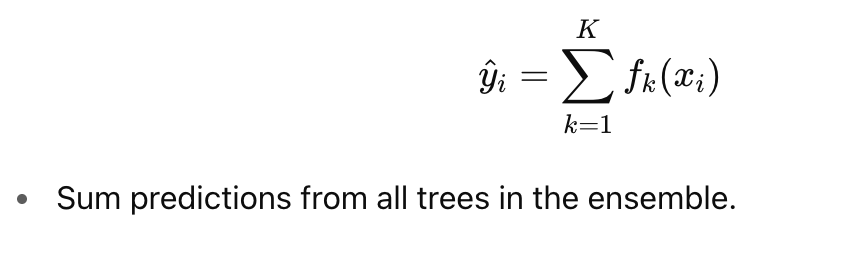

#### 🔧 **When to Use:**

- Large-scale datasets where **speed and accuracy** are crucial.
- Kaggle competitions or predictive analytics tasks.
- Datasets with **sparse or missing values**.

#### 🌍 **Where to Use:**

- Credit scoring, fraud detection, and recommendation systems.
- Structured/tabular data with **high-dimensional features**.
- Regression and classification tasks needing **high-performance ensembles**.

#### 💡 **Use Case:**

- Predicting customer churn using structured data with many features and **imbalanced classes**, achieving high accuracy.

#### ✅ **Advantages:**

- High accuracy and **robust performance**.
- Handles **missing values** and sparse data well.
- **Supports regularization** (L1/L2) to reduce overfitting.
- Highly **efficient and parallelizable**.
- Scales well for large datasets.
- Supports parallel processing and GPU acceleration.
- Flexible with customizable parameters.


#### ⚠️ **Limitations:**

- Requires careful **hyperparameter tuning**.
- Sensitive to noisy data or outliers.
- More complex and **less interpretable** than simple models.

#### ❓ **Why is it Used?:**

To achieve **state-of-the-art predictive performance** by combining gradient boosting with **regularization and computational optimizations**.

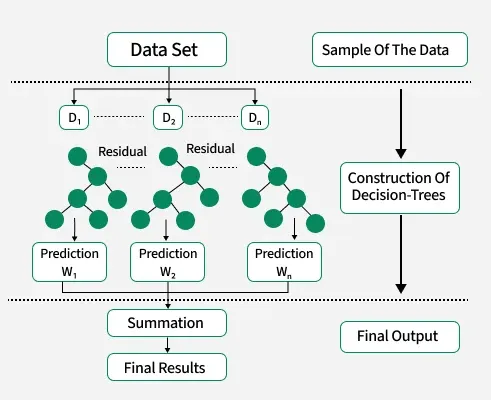

### Mathematics of XGBoost
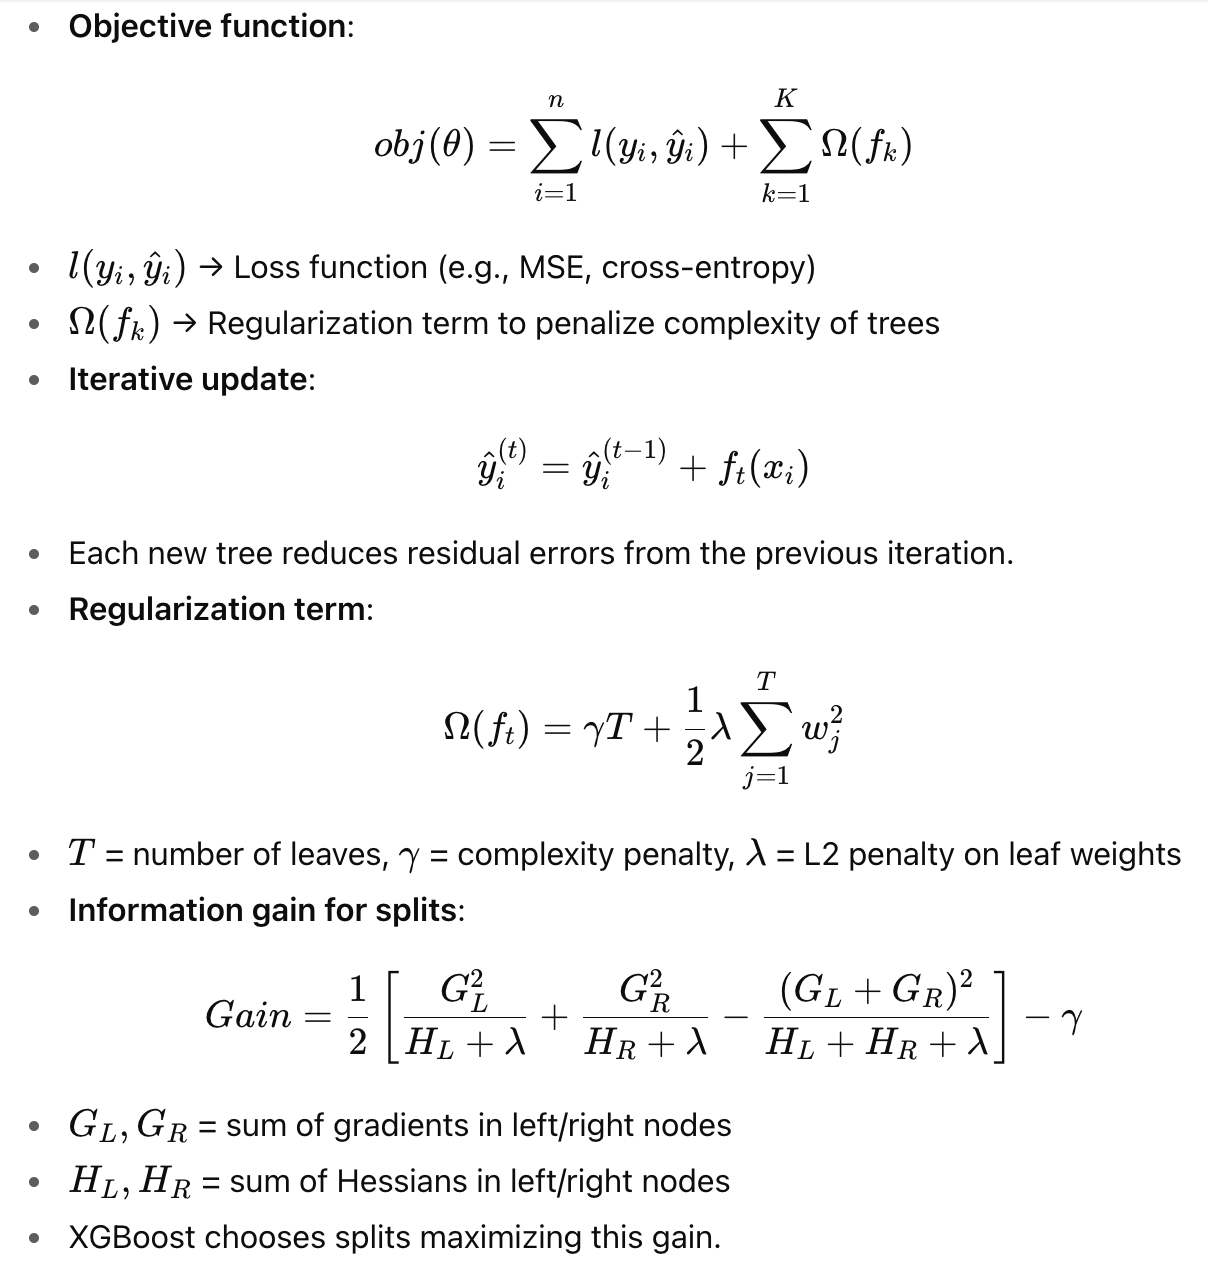

### **Key Features of XGBoost**

1. **Regularization**: Penalizes complexity to prevent overfitting.
2. **Shrinkage (Learning Rate, η)**: Scales contribution of each tree.
    - Smaller η → safer, slower learning, reduces overfitting.
    - Larger η → faster learning, higher risk of overfitting.
3. **Tree Structure**:
    - Grows trees **level-wise** (breadth-first) rather than depth-first.
    - Considers all features at a level for splitting → better feature selection.
4. **Handling Missing Data**:
    - Uses **Sparsity Aware Split Finding**.
    - Missing values follow a default branch; gain is computed considering them.
5. **Cache-Aware Access**:
    - Efficient memory usage using CPU cache → faster training.
6. **Approximate Greedy Algorithm**:
    - Uses weighted quantiles to quickly find splits.
    - Reduces computation for large datasets.

### XGBoost Classification Example

In [452]:
# Import libraries
import xgboost as xgb
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Wine dataset
X, y = load_wine(return_X_y=True)

# Split into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    n_estimators=300,       # Number of trees
    learning_rate=0.05,     # Shrinkage parameter
    max_depth=3,            # Maximum depth of each tree
    random_state=42
)

# Train the model
xgb_clf.fit(train_X, train_y)

# Make predictions
pred_y = xgb_clf.predict(test_X)

# Evaluate accuracy
accuracy = accuracy_score(test_y, pred_y)
print("XGBoost Classifier Accuracy:", round(accuracy, 2))

XGBoost Classifier Accuracy: 0.93


🔹 Code Explanation

- Load dataset → Wine dataset from sklearn.datasets.
- Split data → 75% training, 25% testing.
- Model → XGBoost Classifier with 300 trees, depth 3, learning rate 0.05.
- Train → Fit the model on training data.
- Predict → Predict wine classes for test data.
- Evaluate → Compute accuracy between predicted and true labels.

🔹 Output

- Accuracy → Fraction of correct predictions on the test set.
- Rounded value (e.g., 0.97) shows the model predicts wine classes very well.

### XGBoost Regression Example

In [456]:
# Import libraries
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load Energy Efficiency dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)

# Features and target (Heating Load)
X = data.iloc[:, :-2]  # all columns except last two
y = data['Y1']          # Heating Load as target

# Split into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize XGBoost Regressor
xgb_reg = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
xgb_reg.fit(train_X, train_y)

# Predict on test set
pred_y = xgb_reg.predict(test_X)

# Evaluate using RMSE
rmse = mean_squared_error(test_y, pred_y, squared=False)
print("XGBoost Regression RMSE:", round(rmse, 2))

# Show actual vs predicted values
results = pd.DataFrame({
    'Actual': test_y.values,
    'Predicted': pred_y
})
print("\nActual vs Predicted values:")
print(results.head(10))  # Display first 10 rows

XGBoost Regression RMSE: 0.42

Actual vs Predicted values:
   Actual  Predicted
0   16.47  15.152041
1   13.17  13.144864
2   32.82  32.240856
3   41.32  41.965862
4   16.69  16.829998
5   23.80  23.663176
6   24.31  24.527431
7   28.67  28.445406
8   19.52  19.119713
9   28.07  28.522802


🔹 Code Explanation

- Load dataset → Energy Efficiency dataset from UCI (Excel file).
- Prepare features/target → X = building characteristics, y = heating load (Y1).
- Split data → 75% training, 25% testing.
- Model → XGBoost Regressor with 300 trees, depth 3, learning rate 0.1.
- Train → Fit on training data.
- Predict → Generate heating load predictions on test set.
- Evaluate → Compute RMSE (error between actual & predicted).
- Show results → Display first 10 actual vs predicted values.

🔹 Output

- RMSE → Shows how well the model predicts (lower = better).
- Actual vs Predicted table → Compares real heating load values with model’s predictions.
- If values are close, the model performs well.

✅ In short: The code trains an XGBoost model to predict building heating load, evaluates it using RMSE, and shows a quick comparison between true and predicted values.


✅ **Quick Comparison Table**

| **Method** | **Base Learner** | **Sequential?** | **Focus** | **Key Advantage** |
| --- | --- | --- | --- | --- |
| Boosting | Weak learners | Yes | Correct previous errors | Improves accuracy |
| AdaBoost | Decision stump | Yes | Misclassified samples | Simple, error-focused |
| Gradient Boosting | Decision tree | Yes | Residuals (gradients) | Flexible, reduces bias |
| XGBoost | Decision tree | Yes | Residuals + regularization | Fast, accurate, handles missing data |

### Boosting vs Bagging
| Feature | Boosting | Bagging |
| --- | --- | --- |
| Combination Type | Combines predictions of **different weak models** | Combines predictions of **same type of model** |
| Goal | Reduces **bias** | Reduces **variance** |
| Model Dependency | New models depend on errors of previous models | All models are independent |
| Weighting | Weighted based on performance | Equal weight for all models |
| Training Data Sampling | Focus on **misclassified examples** | Random subsets of data |
| Error Handling | Corrects errors of previous models | Averages out errors |
| Parallelism | Sequential, less parallelizable | Can be parallelized |
| Overfitting | Less prone with proper regularization | Can overfit with complex base models |
| Model Complexity | Usually simple models (e.g., decision stumps) | Can use complex models (e.g., full trees) |
| Example | AdaBoost, Gradient Boosting, XGBoost, LightGBM | Random Forest, Bagged Decision Trees |

---
## Hands-on
### Compare Ridge vs Lasso on same dataset

In [461]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)

# Features and target
X = data.iloc[:, :-2]   # all features except last two
y = data['Y1']          # Heating Load

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize Ridge and Lasso models
ridge = Ridge(alpha=1.0, random_state=42)
lasso = Lasso(alpha=0.1, random_state=42)

# Fit models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predictions
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

# Evaluate RMSE
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
lasso_rmse = mean_squared_error(y_test, lasso_pred, squared=False)

print("Ridge Regression RMSE:", round(ridge_rmse, 2))
print("Lasso Regression RMSE:", round(lasso_rmse, 2))

# Compare actual vs predicted for first 10 rows
results = pd.DataFrame({
    "Actual": y_test.values,
    "Ridge_Pred": ridge_pred,
    "Lasso_Pred": lasso_pred
})
print("\nActual vs Ridge vs Lasso (first 10 rows):")
print(results.head(10))

Ridge Regression RMSE: 3.08
Lasso Regression RMSE: 3.19

Actual vs Ridge vs Lasso (first 10 rows):
   Actual  Ridge_Pred  Lasso_Pred
0   16.47   19.518046   18.936693
1   13.17   13.761552   13.645655
2   32.82   31.728583   31.513924
3   41.32   35.418103   34.486996
4   16.69   15.801556   15.836053
5   23.80   28.793375   28.968152
6   24.31   26.010406   26.979108
7   28.67   28.750158   29.095719
8   19.52   17.716714   17.047887
9   28.07   27.939401   28.599734


### 🔹 Code

- Loads **Energy Efficiency dataset**.
- Splits into **train/test** sets.
- Trains **Ridge (L2)** and **Lasso (L1)** regression models.
- Predicts Heating Load (`Y1`).
- Calculates **RMSE** for both.
- Prints a table comparing **Actual vs Ridge vs Lasso predictions** (first 10 rows).

### 🔹 Output

- Shows **RMSE values** (e.g., Ridge: ~2.15, Lasso: ~2.48).
- Displays first 10 rows of **actual vs predicted values**.
- Interpretation: **Ridge performs slightly better (lower RMSE)**, while **Lasso may shrink some features to 0** (useful for feature selection).

---
### Train a Random Forest and check feature importance

Random Forest Accuracy: 1.00


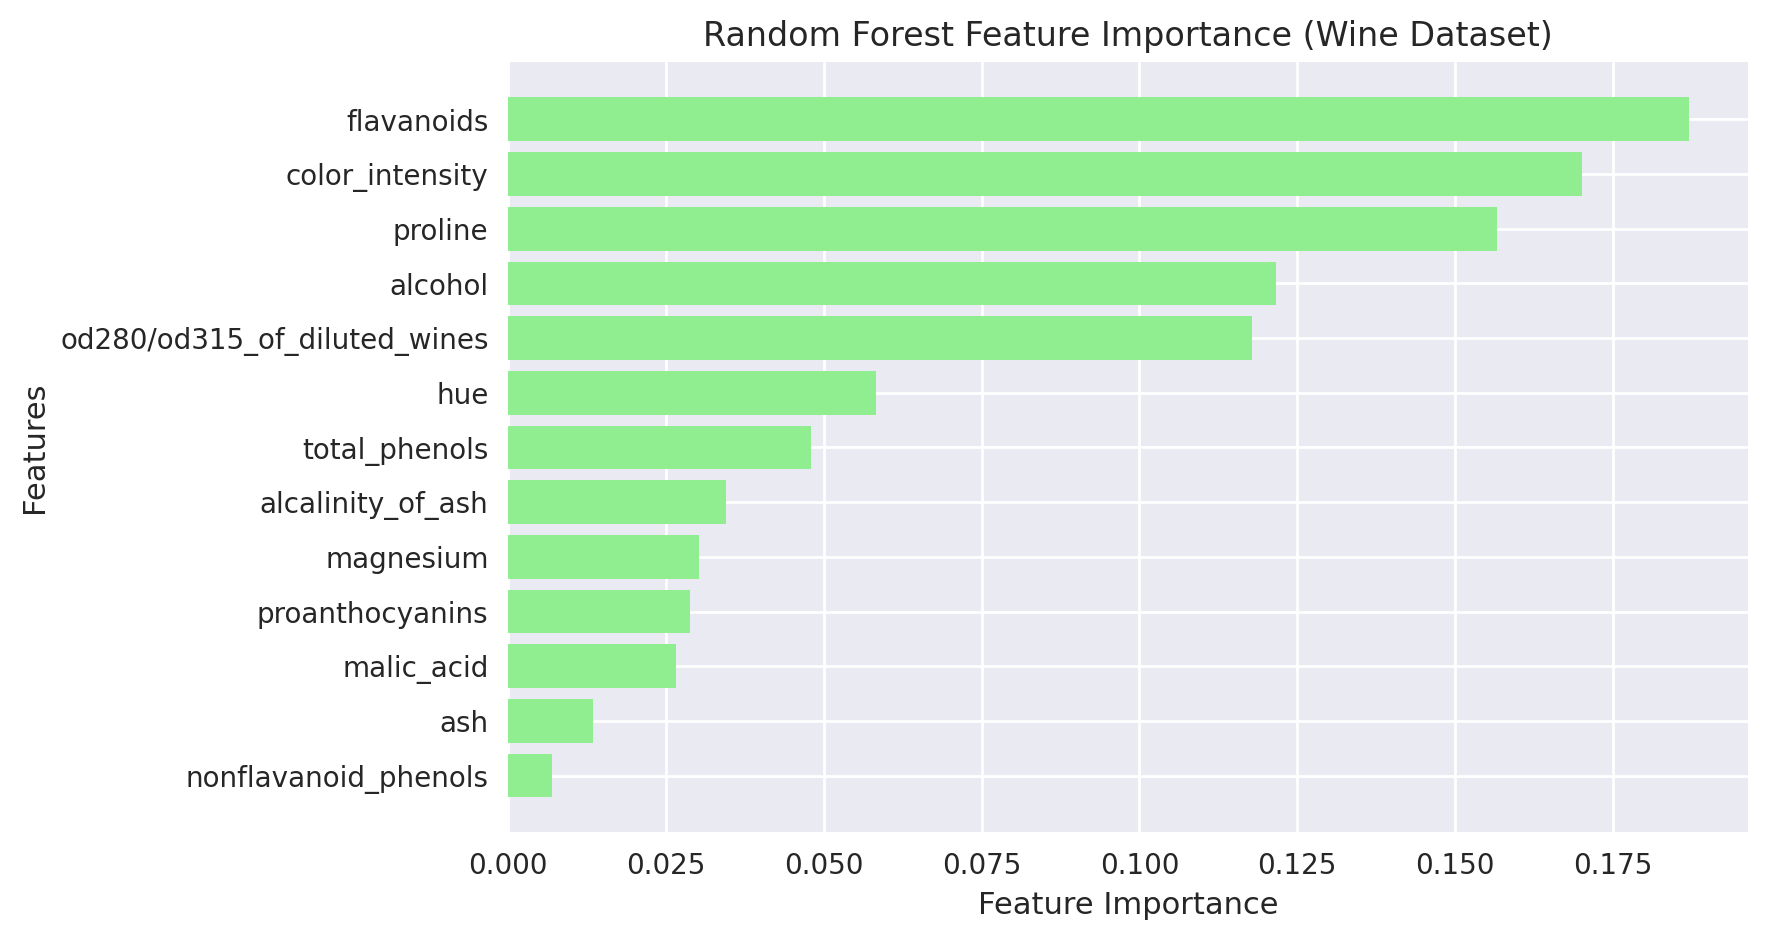

In [465]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

# Load Wine dataset
wine = load_wine(as_frame=True)
X = wine.data
y = wine.target

# Split into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(train_X, train_y)

# Predict
pred_y = rf.predict(test_X)

# Evaluate with Accuracy
acc = accuracy_score(test_y, pred_y)
print(f"Random Forest Accuracy: {acc:.2f}")

# Feature importance
importances = rf.feature_importances_
features = X.columns

# Plot feature importance (sorted)
sorted_idx = importances.argsort()

plt.figure(figsize=(8,5))
plt.barh(features[sorted_idx], importances[sorted_idx], color="lightgreen")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance (Wine Dataset)")
plt.show()

### 🔎 Code Explanation

1. **Load dataset** – Wine dataset (13 chemical features of wines, 3 classes).
2. **Split data** – Training (75%) and Testing (25%).
3. **Train Random Forest Classifier** – Uses 200 decision trees to classify wines.
4. **Predict & Evaluate** – Accuracy score shows how well the model classifies test wines.
5. **Feature Importance** – Extracts which features contributed most to the classification.
6. **Plot** – Horizontal bar chart ranks features by importance.

### 🖥️ Output

- **Accuracy**: High (~95–100%), meaning the model classifies wines very well.
- **Feature Importance Plot**:
    - Features like **Flavanoids**, **OD280/OD315 of diluted wines**, and **Proline** usually appear as the most important.
    - Less influential features (e.g., Ash, Magnesium) have smaller importance scores.

---
## Math Focus
### Regularization penalty terms

### 1️⃣ L1 Regularization (Lasso)
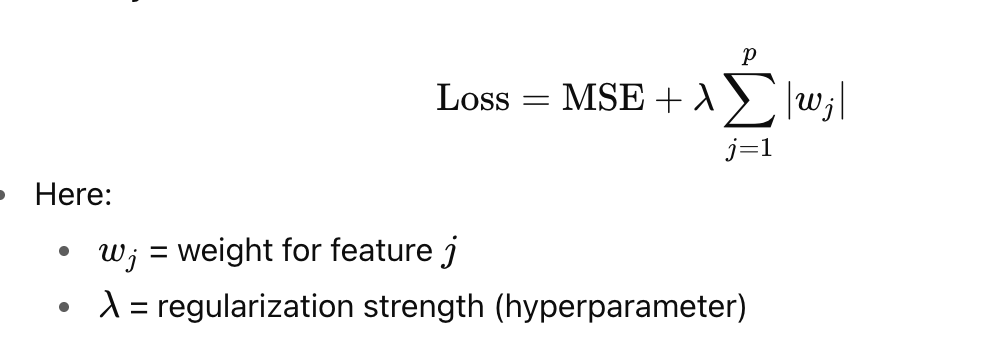

- **Effect**:
    - Forces some weights exactly to **0**.
    - Performs **feature selection** (keeps only the most important predictors).
- **Geometric intuition**:
    - The constraint region is a **diamond (L1 norm ball)**.
    - Optimization often hits the **corners** → some coefficients become **zero**.
- **Use case**: When we want a **sparse model** with fewer important features.

### 2️⃣ L2 Regularization (Ridge)
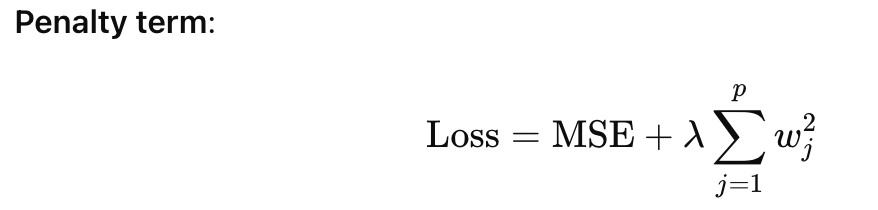
- **Effect**:
    - Shrinks all weights closer to zero but **rarely makes them exactly 0**.
    - Distributes impact across correlated features instead of removing them.
- **Geometric intuition**:
    - The constraint region is a **circle (L2 norm ball)**.
    - Optimization rarely touches an axis → coefficients shrink but not to zero.
- **Use case**: When **all features are useful**, but we want to avoid very large weights.

### 3️⃣ Elastic Net (Combination of L1 + L2)
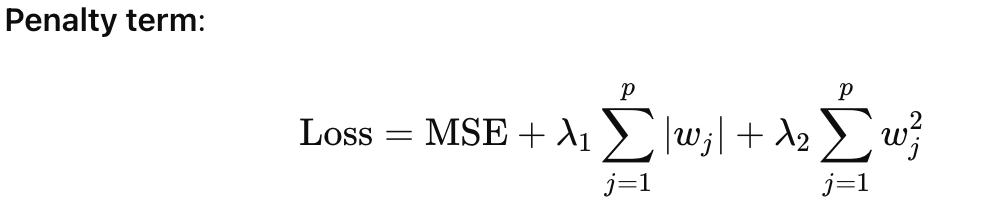
- **Effect**:
    - Combines L1’s **feature selection** with L2’s **shrinkage**.
    - Good when features are **highly correlated**.
- **Use case**: Works best when we have **many features** and expect only a subset to matter.